In [2]:
import pyPyrTools as ppt
import sys
import numpy as np
sys.path.append('..')
import sfp
%matplotlib inline
import seaborn as sns
from pyPyrTools import JBhelpers as jbh
import pandas as pd
from scipy import signal

The following demonstrates some of the stimuli that can be made with the `log_polar_grating` command. The key characteristic of these stimuli is that the frequency (in cycles per pixel) increases as you approach the center of the image. This encodes our hypothesis that the preferred spatial frequency of neurons (and thus, voxels) whose receptive fields are located at the fovea (here, the center of the image) will have a higher preferred spatial frequency than those whose receptive fields are located in the periphery.

However, with these parameters, we notice that there is strange-looking aliasing happening in the center of the image.


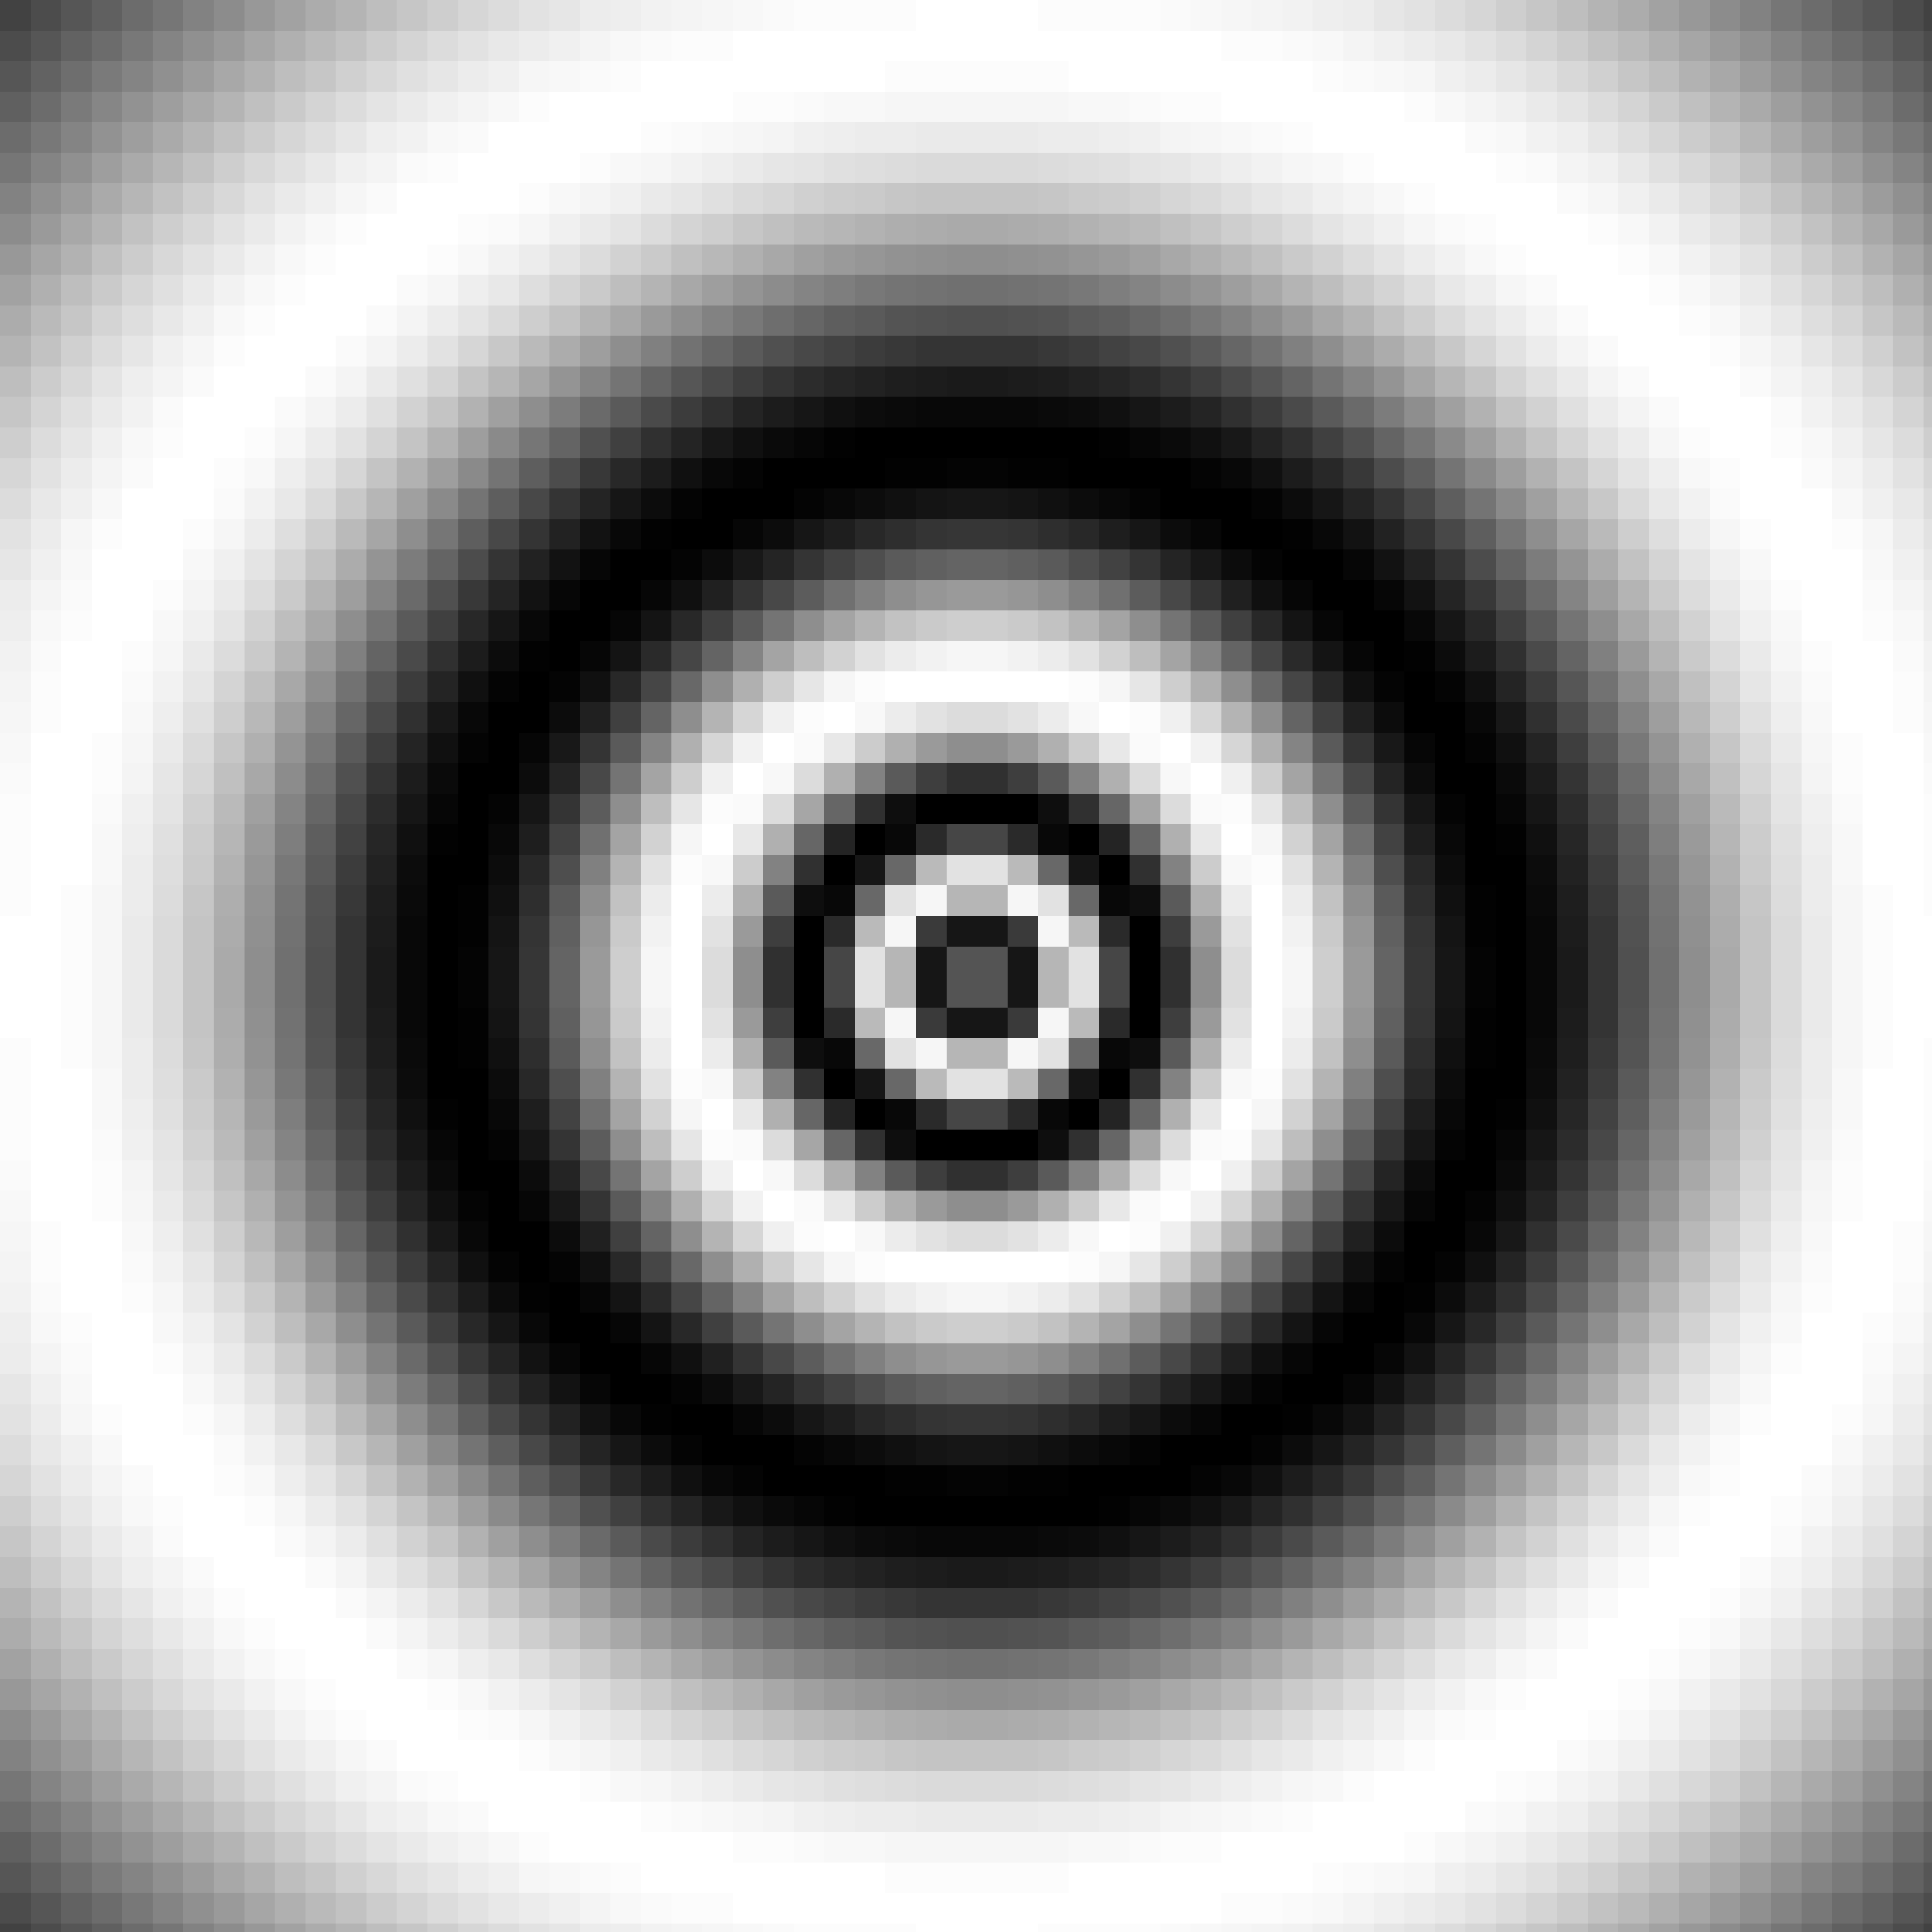
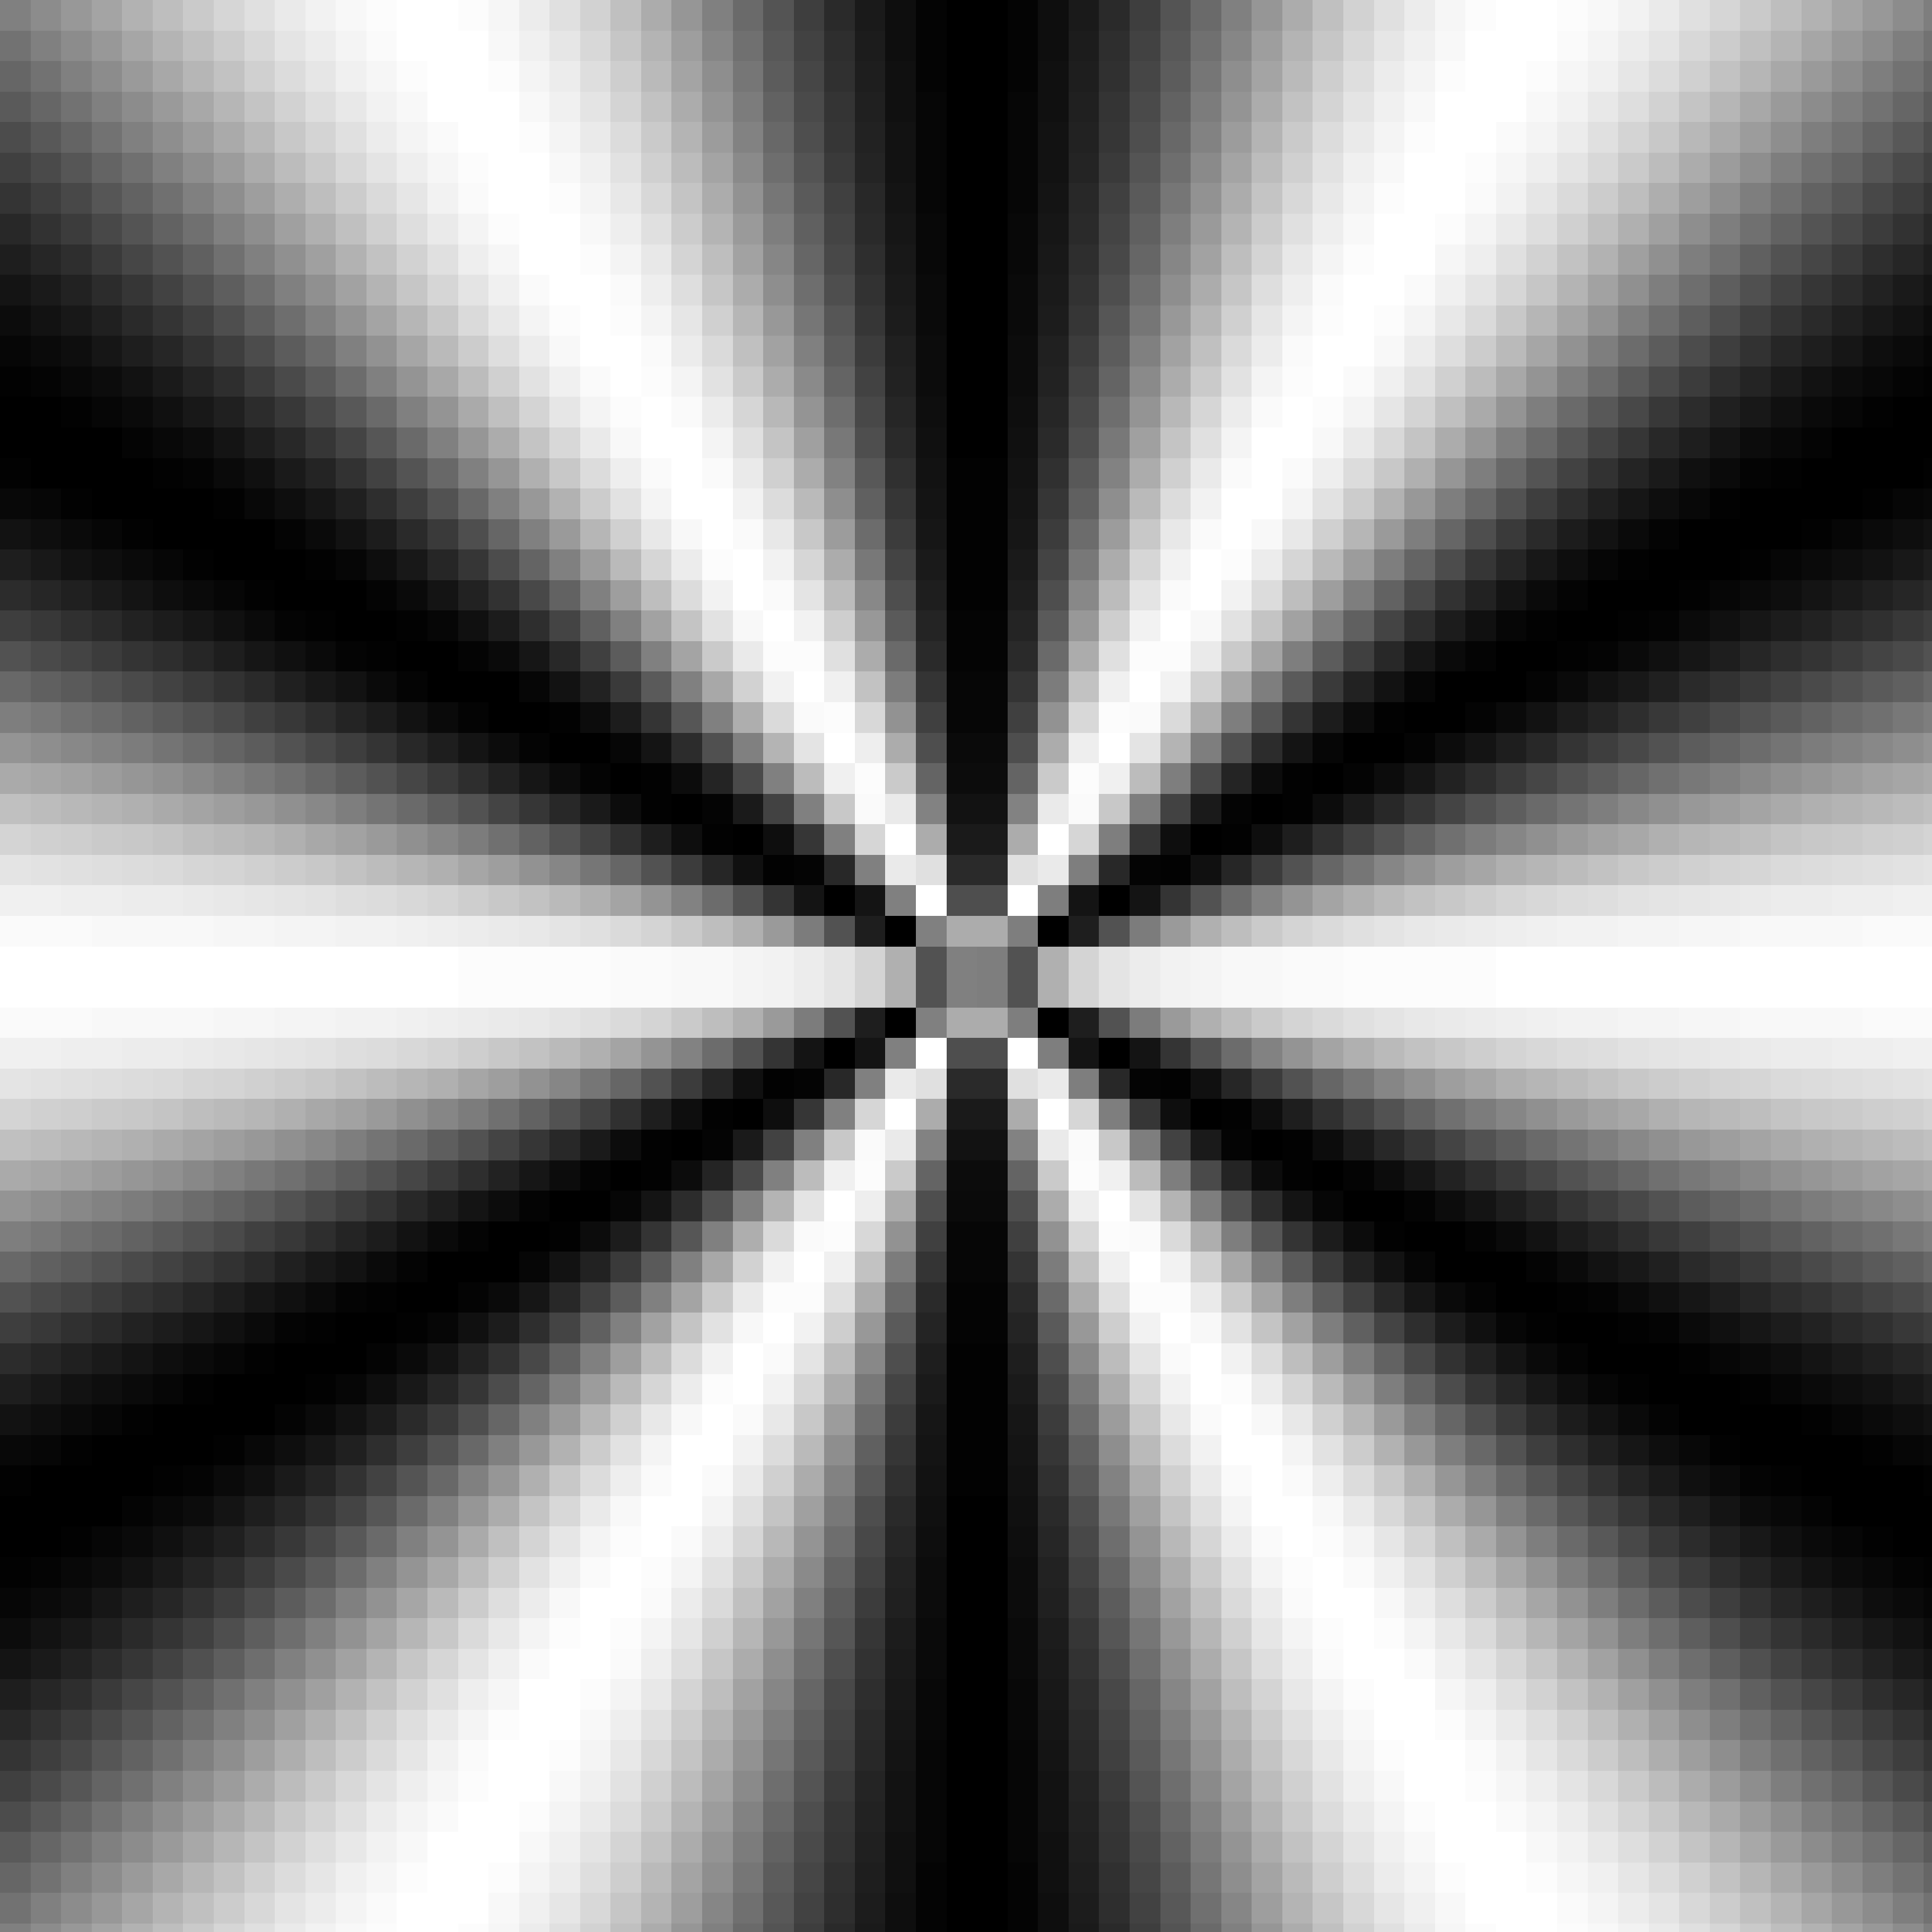
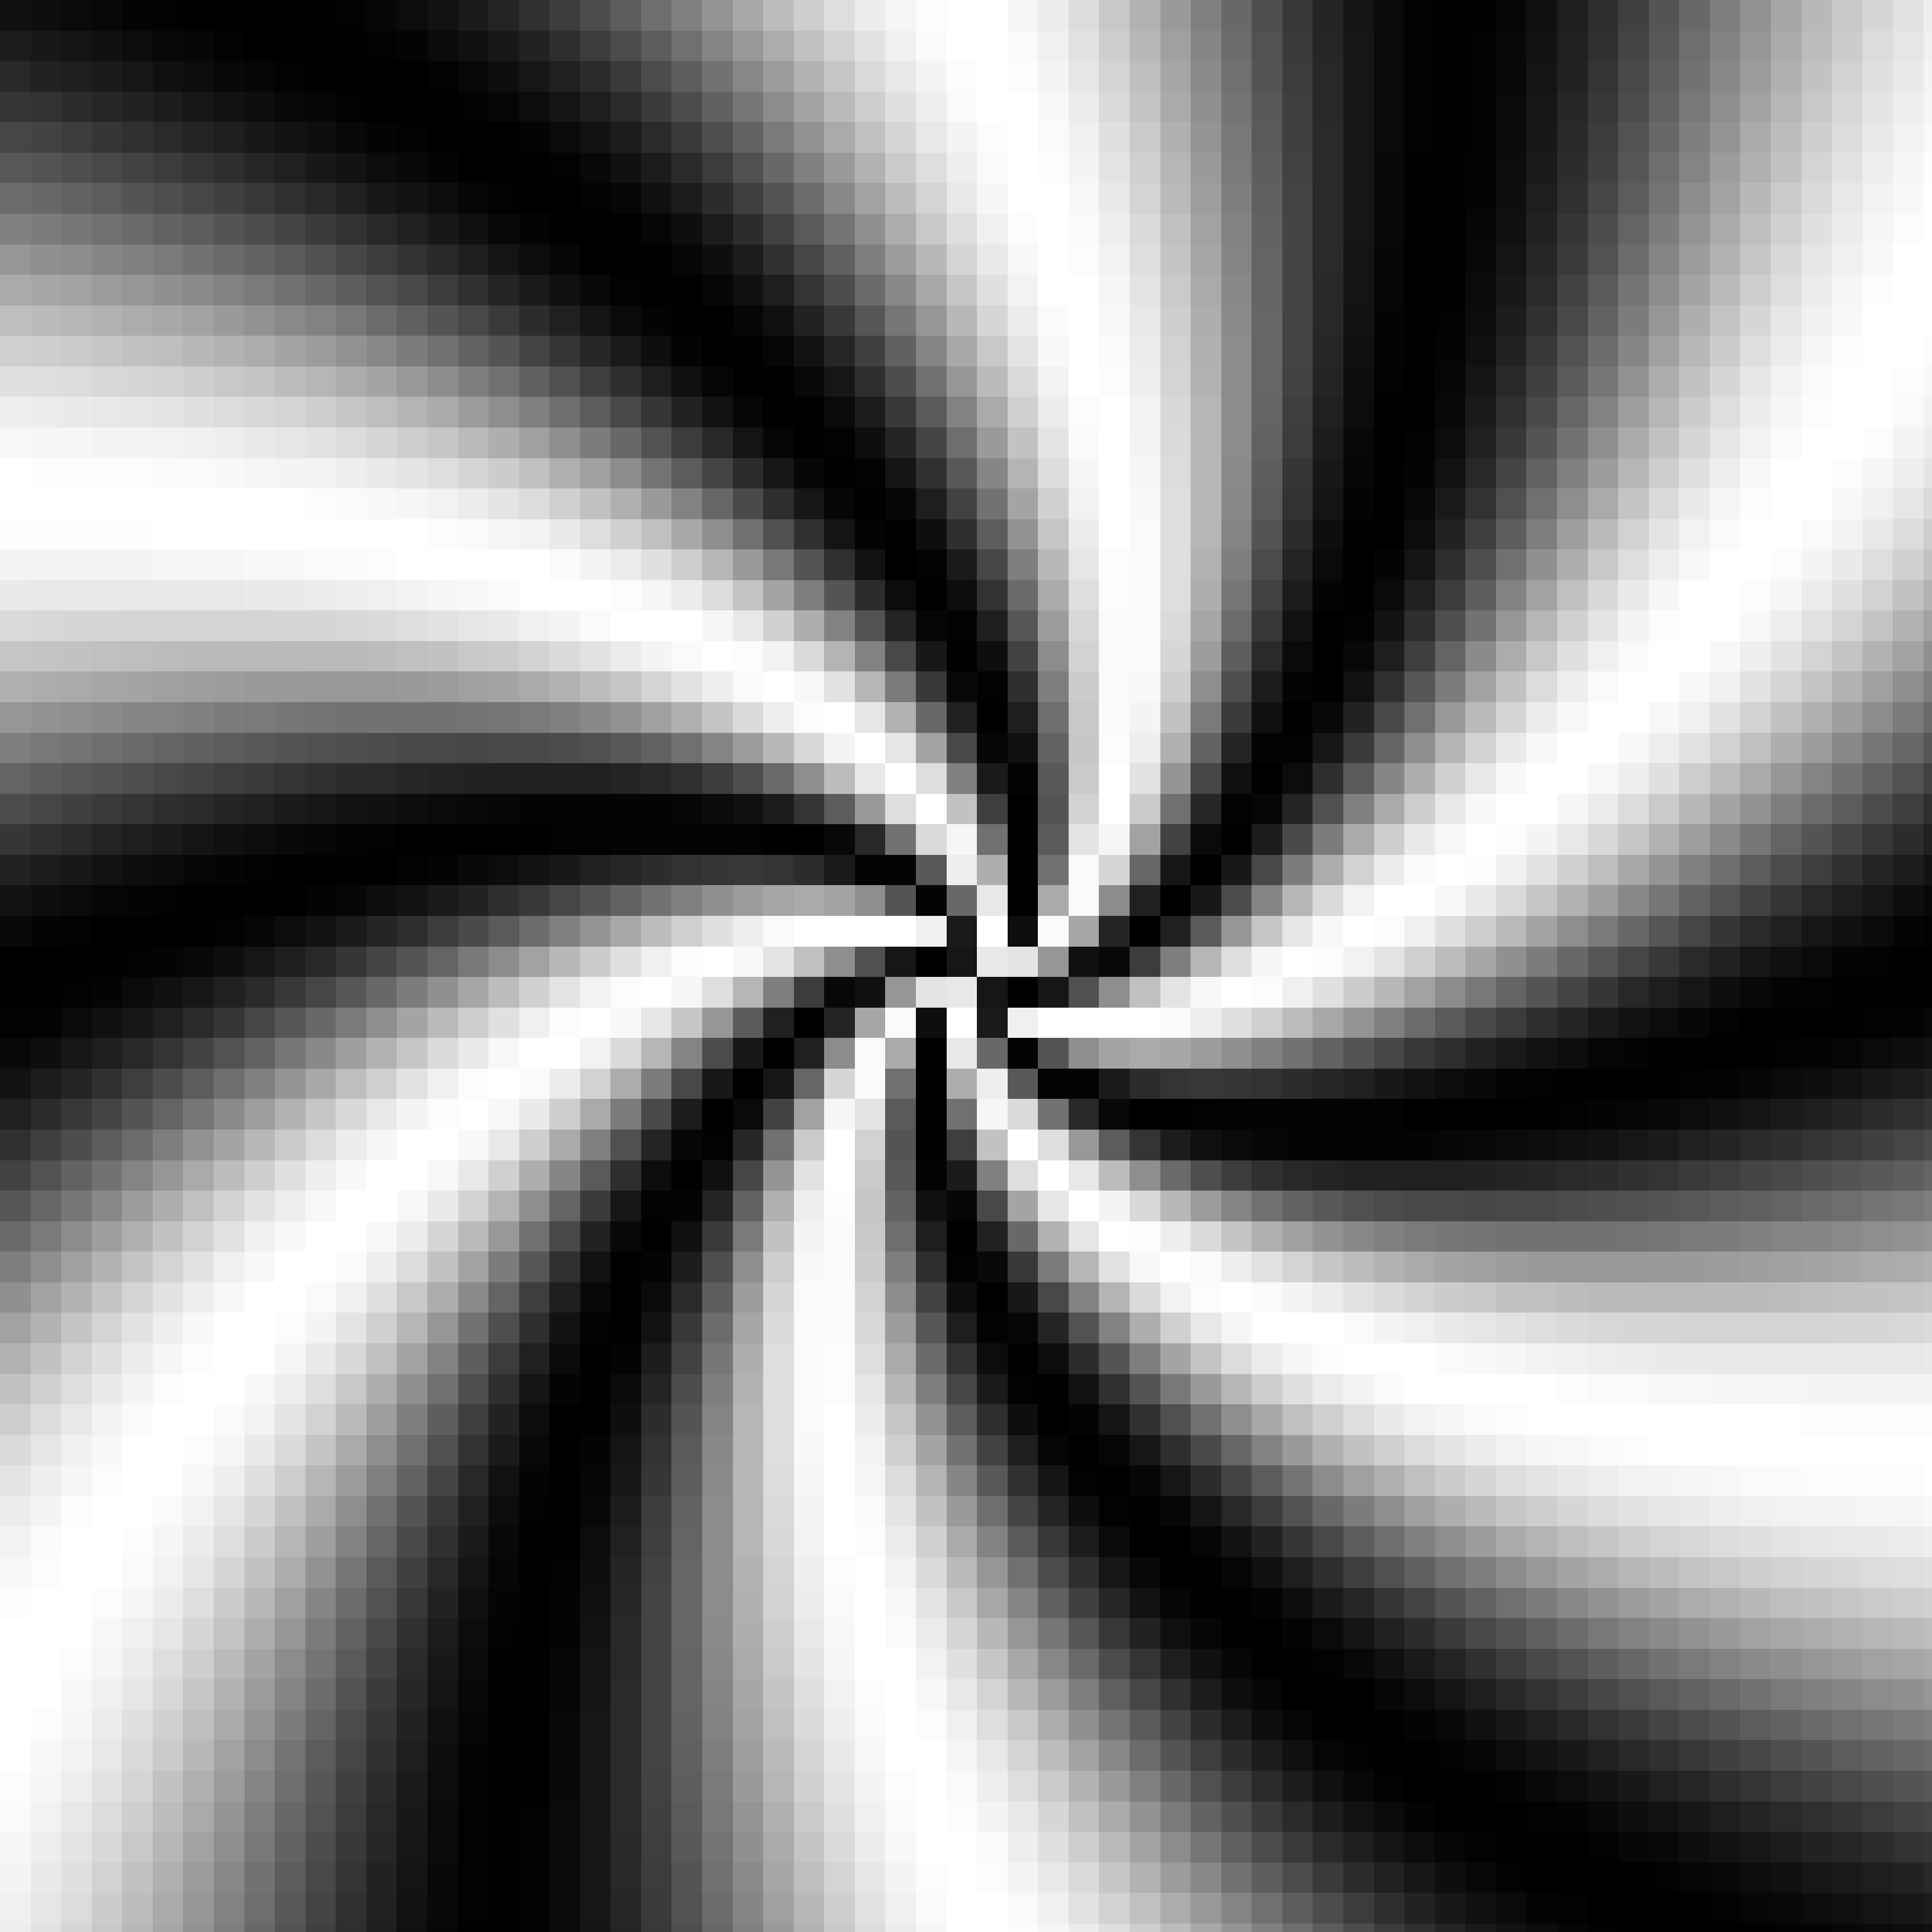
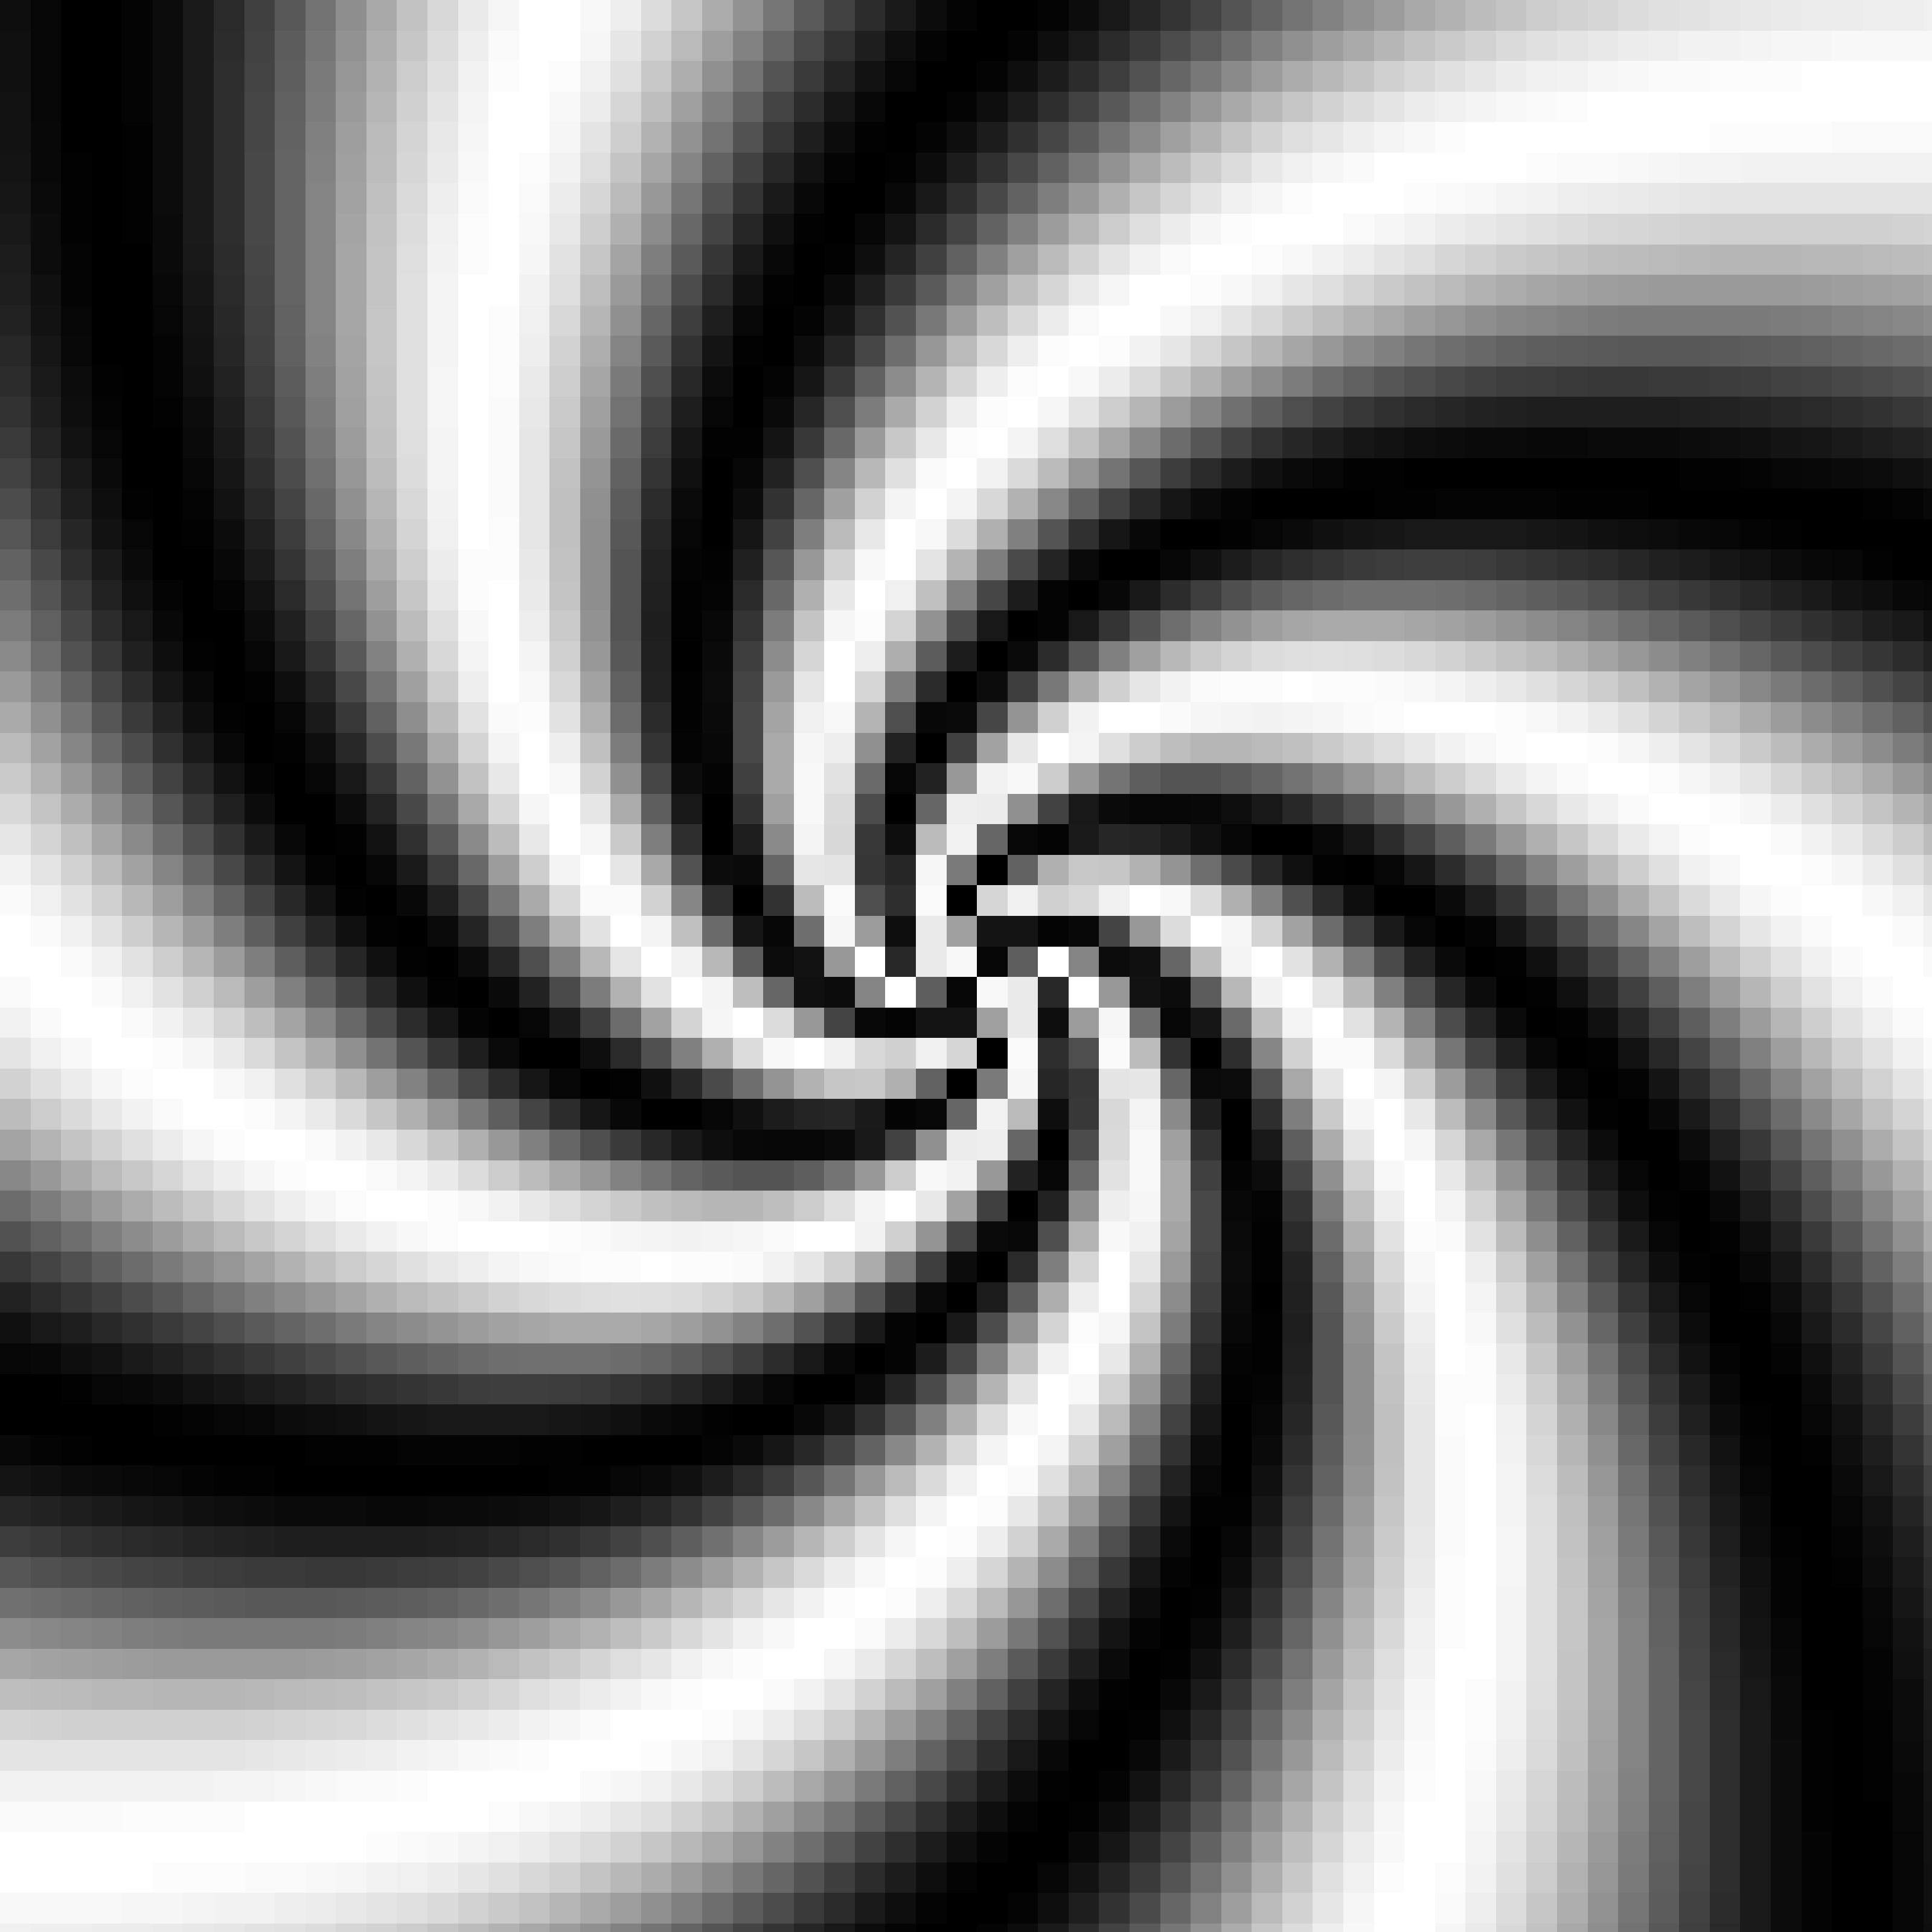
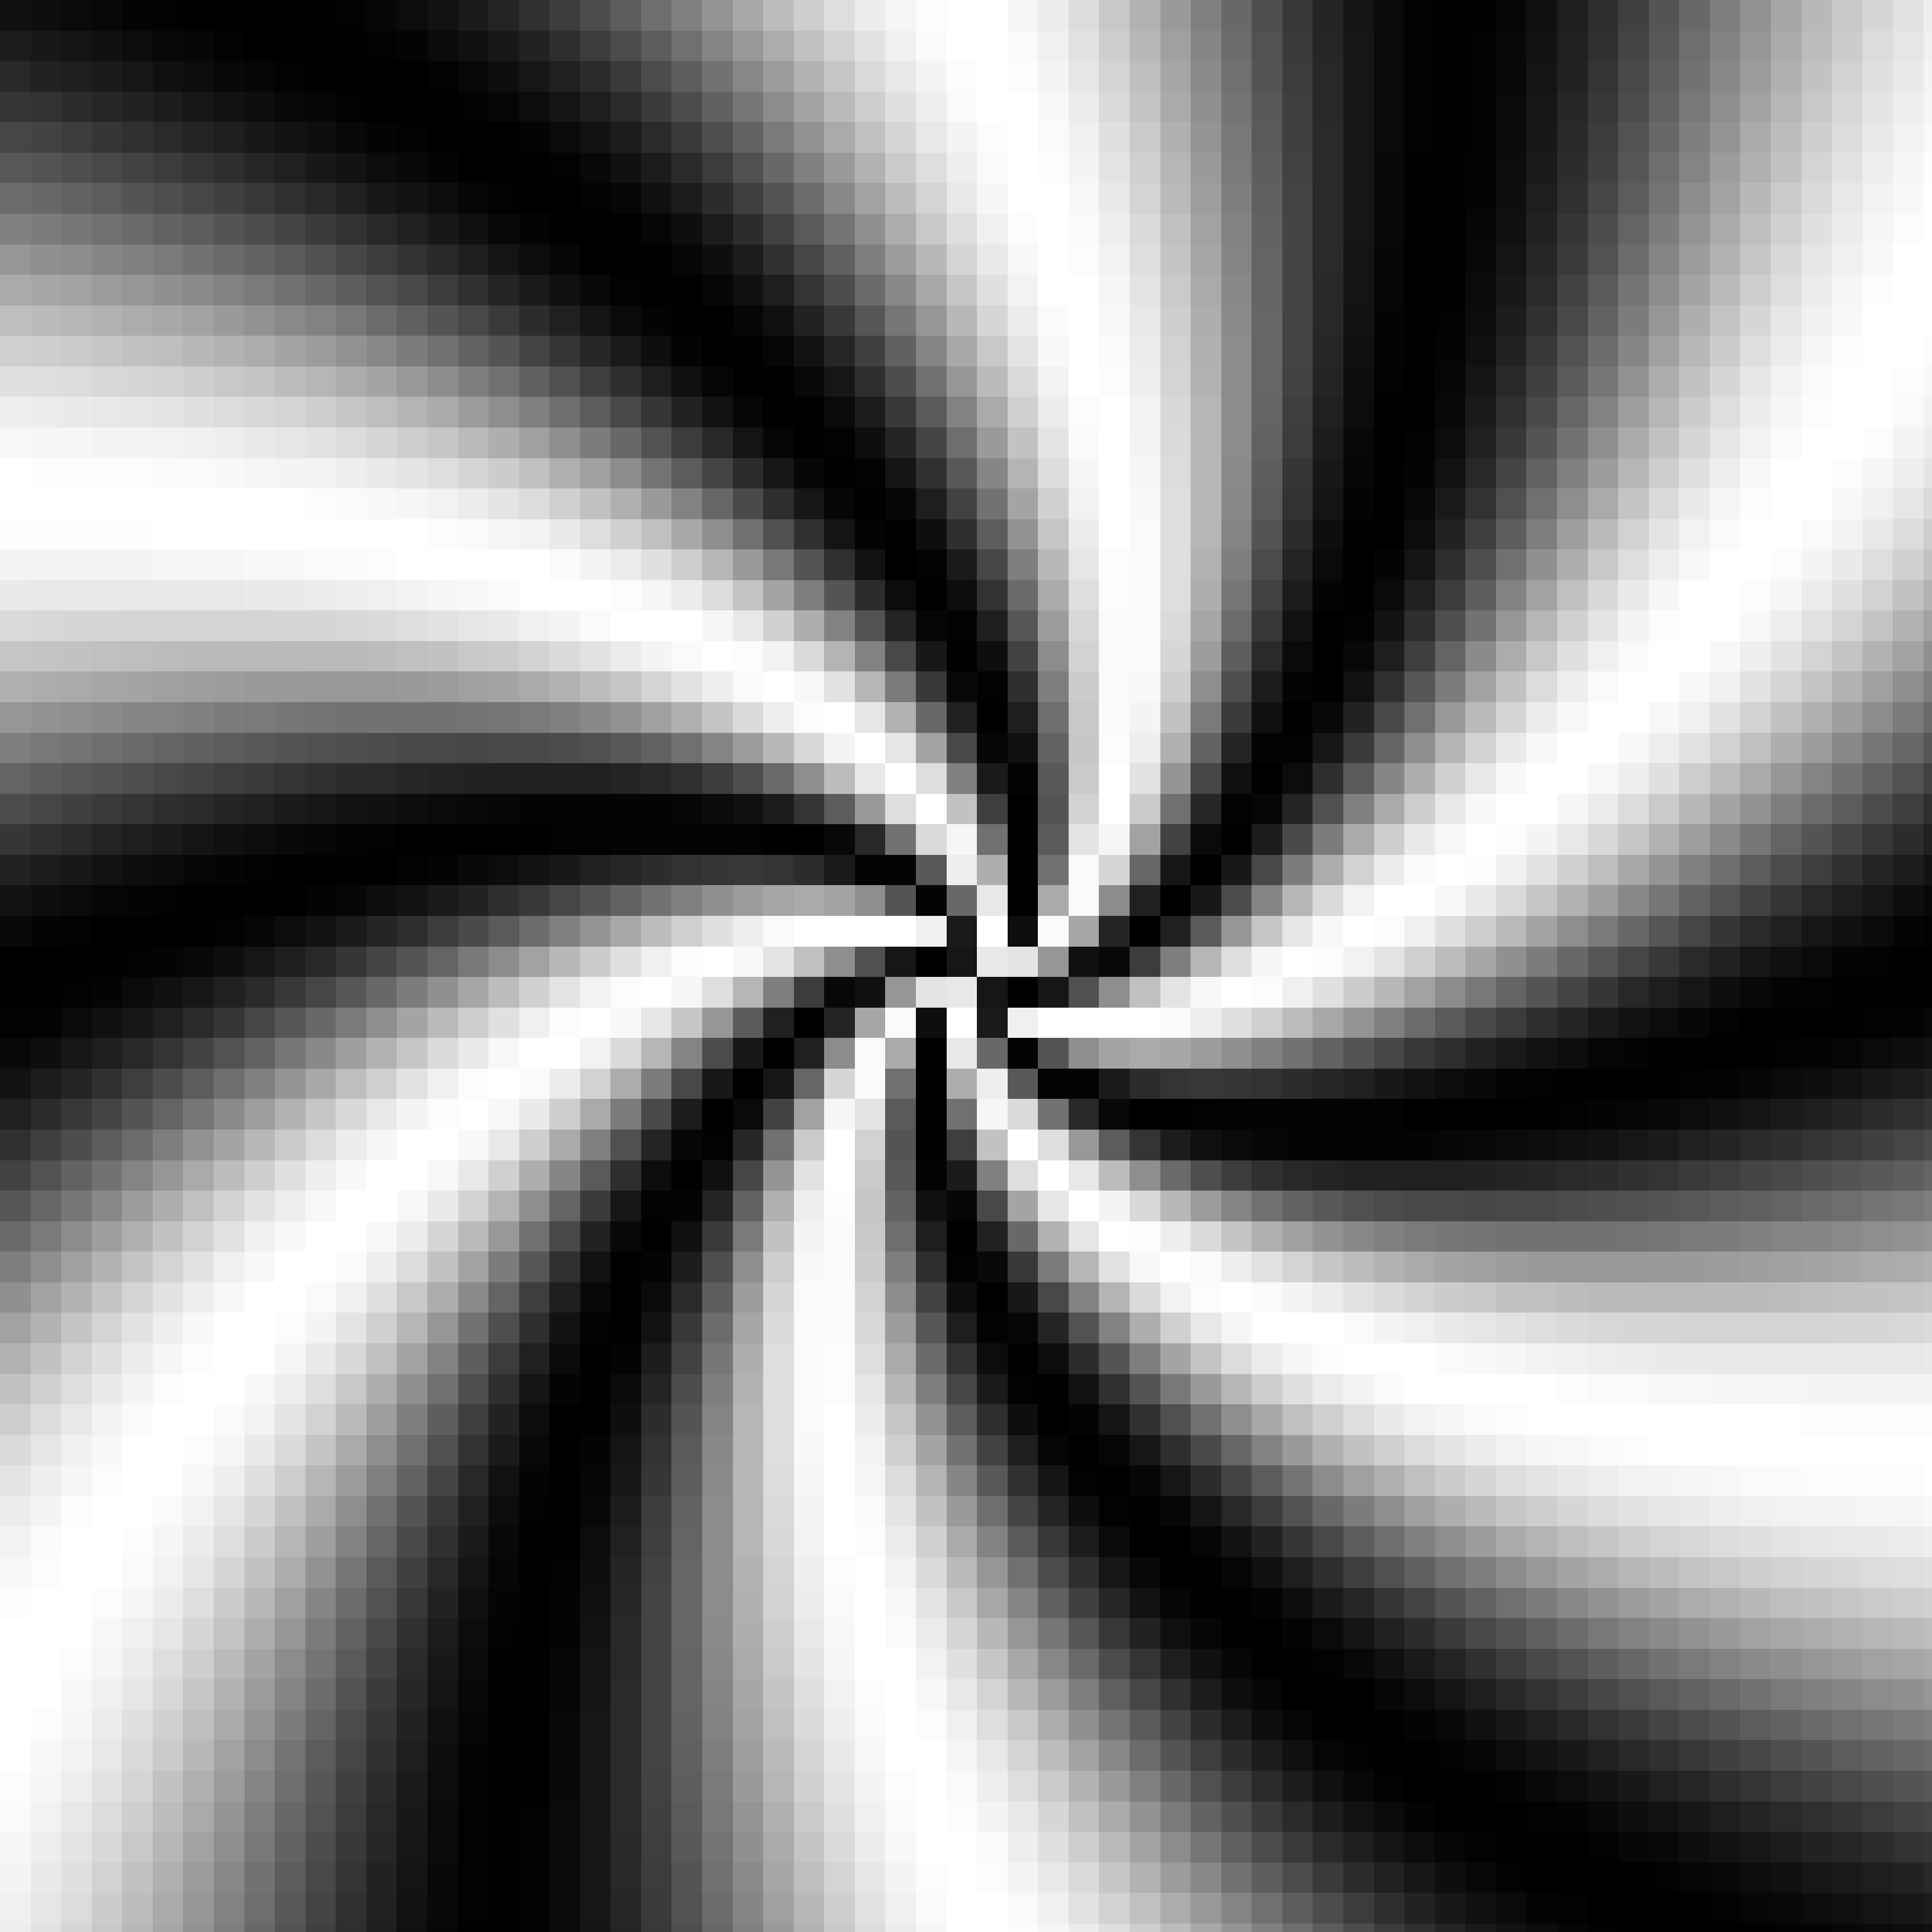
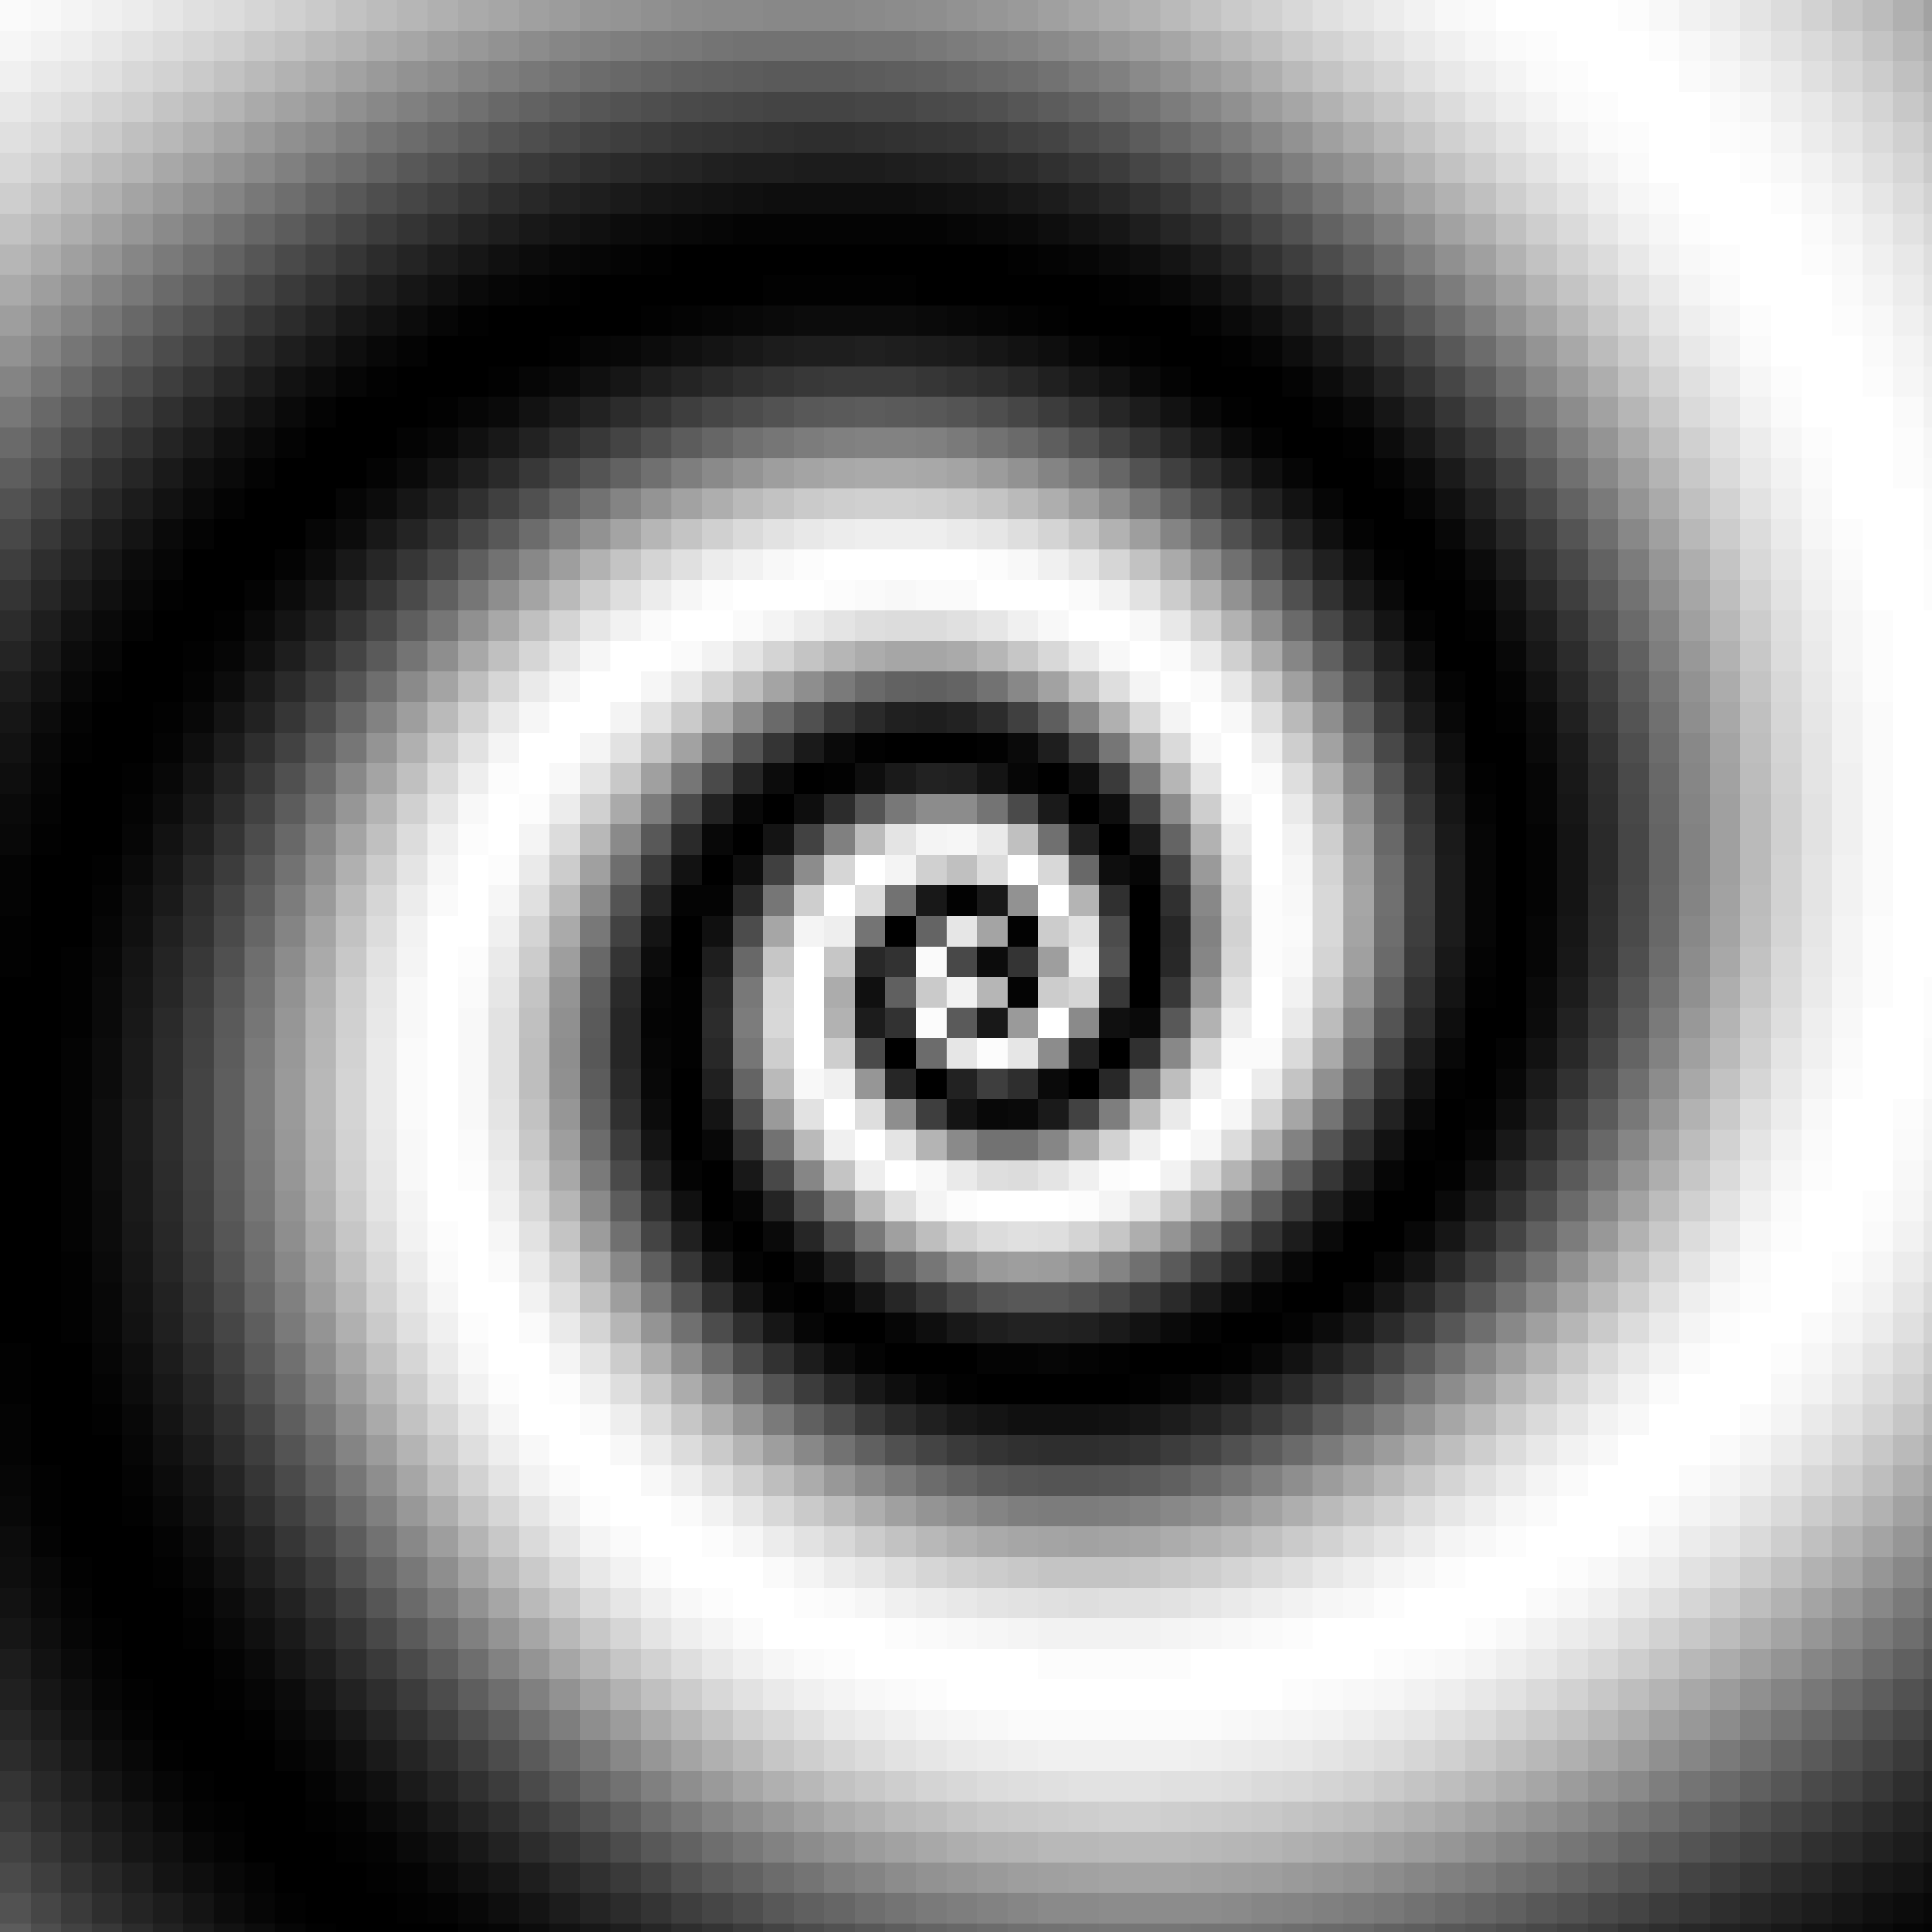
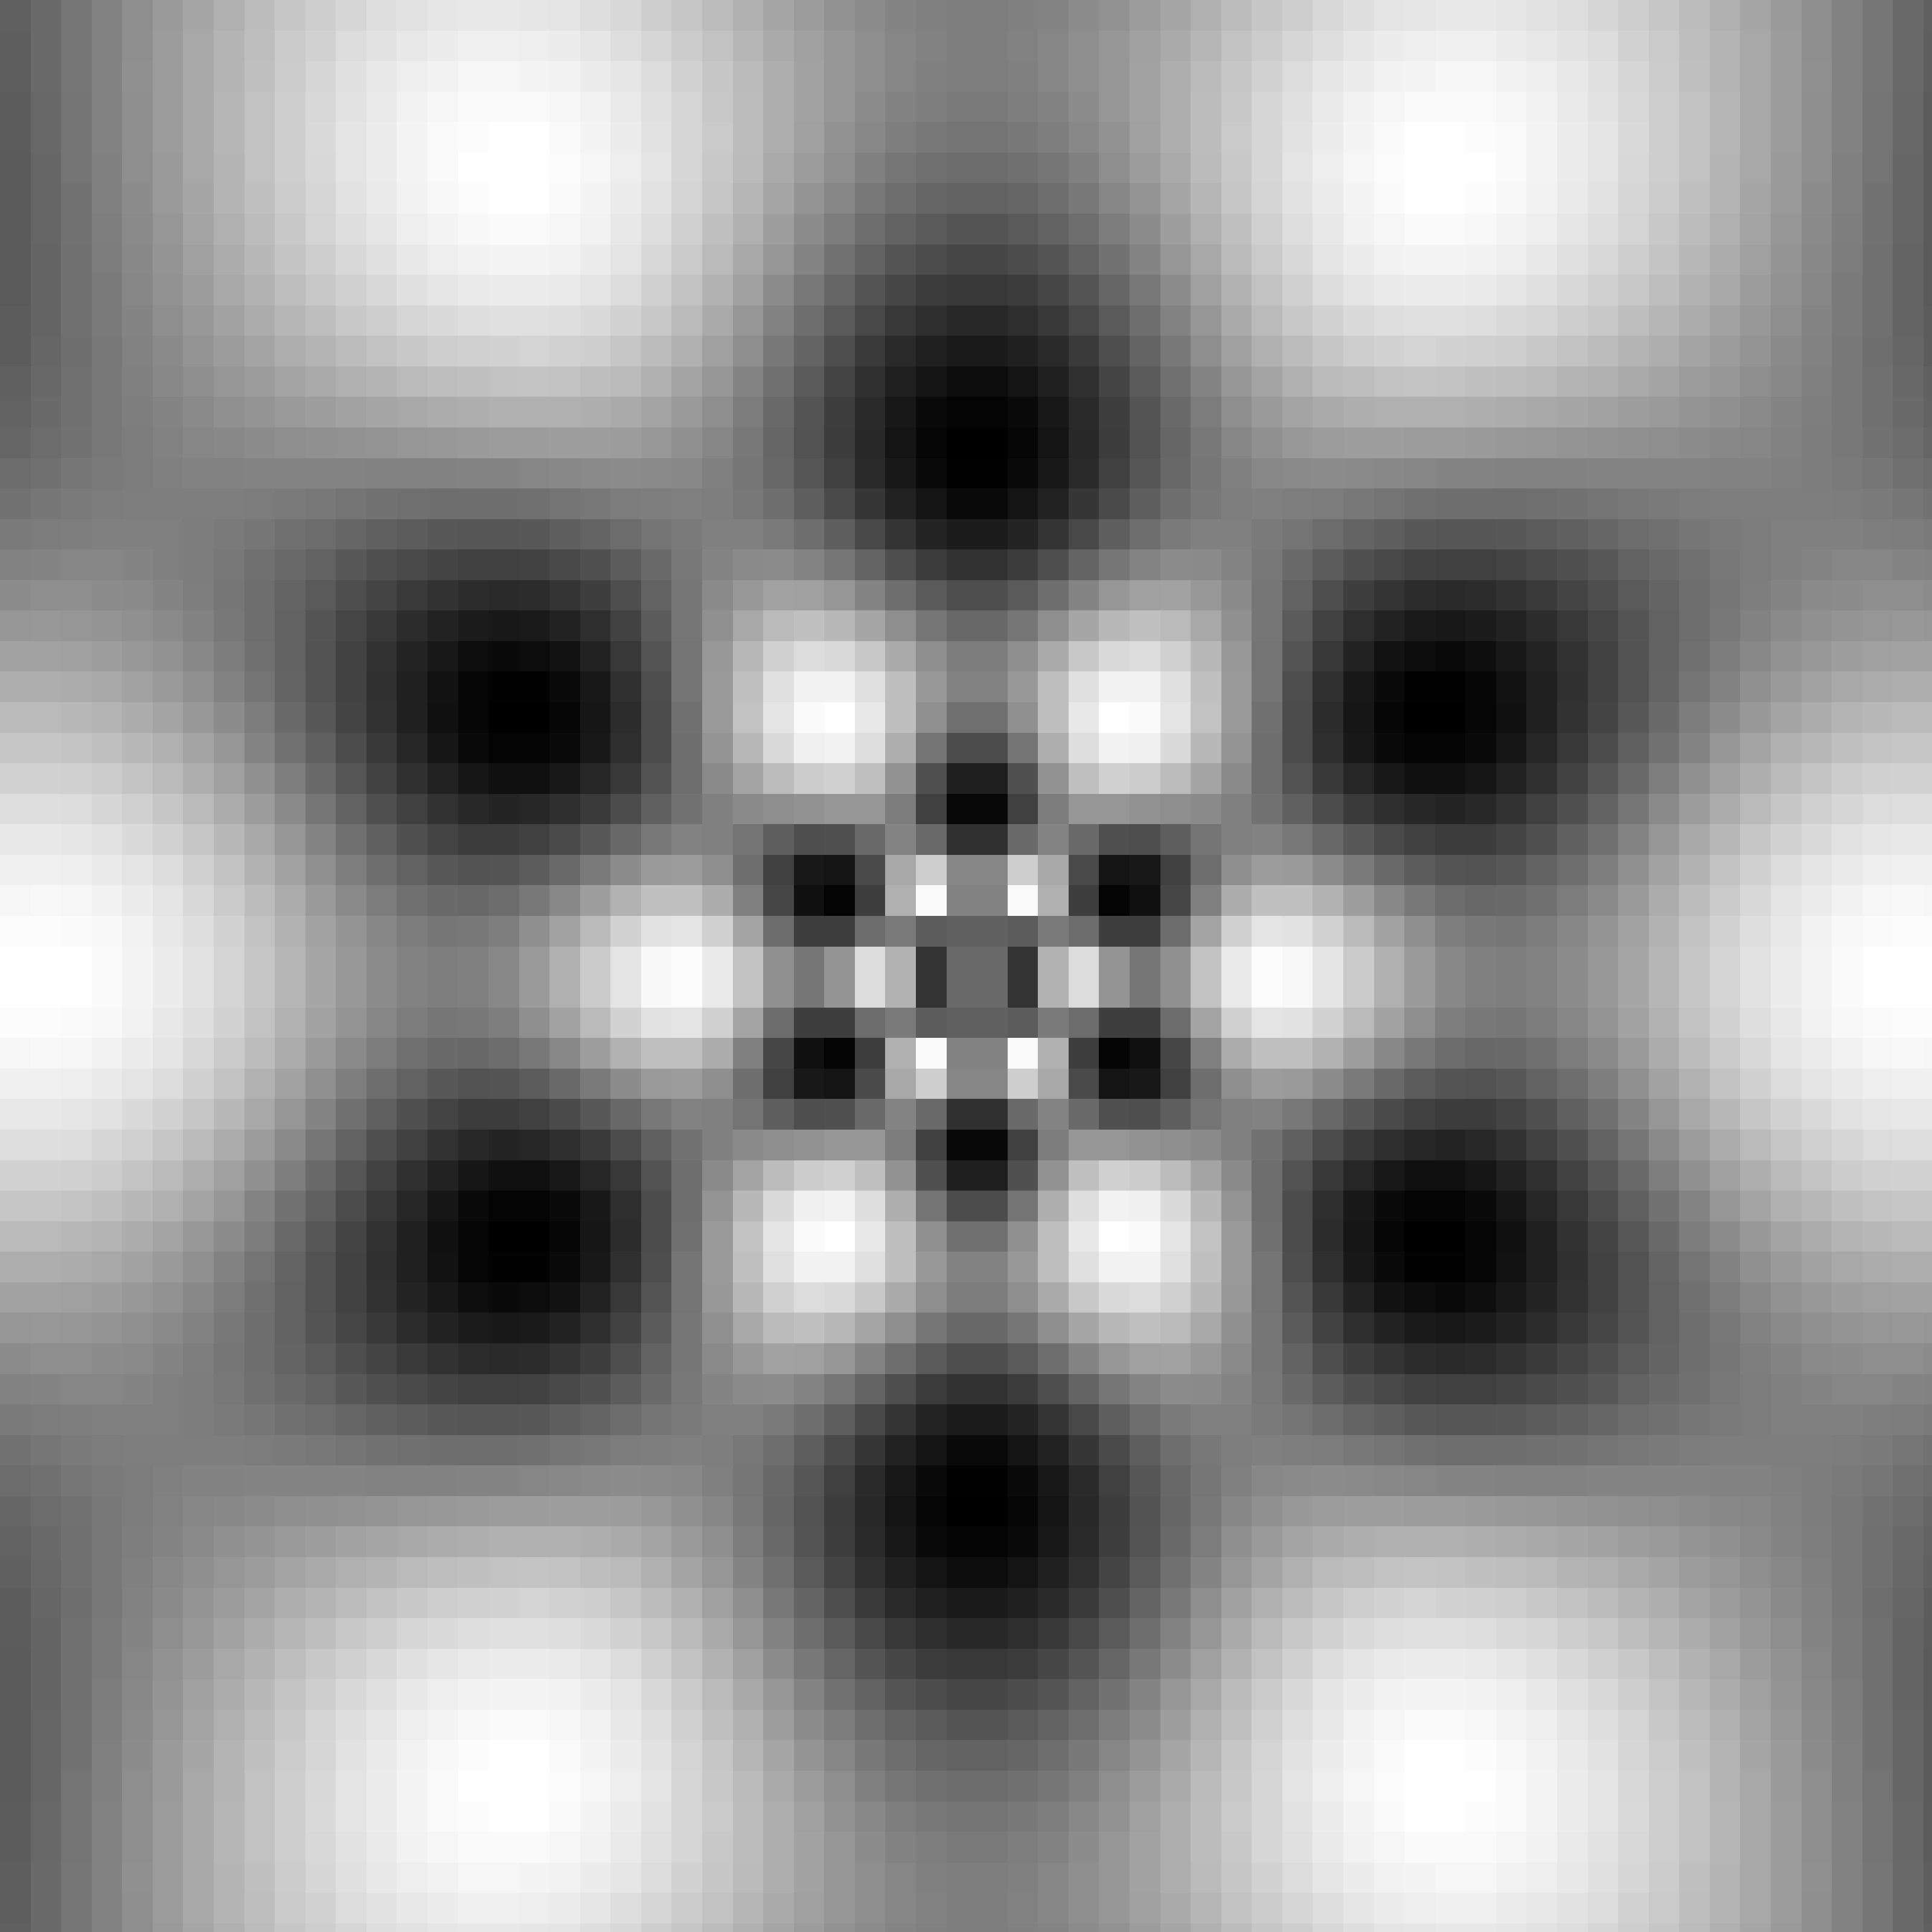

In [13]:
ims = []
freq=6
phase = 0
ampl=1
shape=64
alpha=0
origin = None
ims.append(sfp.stimuli.log_polar_grating(shape, alpha, freq,phi=phase,ampl=ampl, origin=origin))
ims.append(sfp.stimuli.log_polar_grating(shape,alpha, w_a=freq,phi=phase,ampl=ampl))
ims.append(sfp.stimuli.log_polar_grating(shape,alpha, freq/2,freq,phi=phase,ampl=ampl))
ims.append(sfp.stimuli.log_polar_grating(shape,alpha,-freq,freq,phi=phase,ampl=ampl))
ims.append(sfp.stimuli.log_polar_grating(shape,alpha,freq/2,freq,phi=phase,ampl=ampl))
ims.append(sfp.stimuli.log_polar_grating(shape,alpha,freq,freq/4,phi=phase,ampl=ampl))
ims.append(ims[0]+ims[1])
# ims.append(sfp.stimuli._create_better_sampled_grating(shape, alpha, freq, phi=phase, ampl=ampl, orig_origin=origin, check_scale_factor=3))
# ims.append(sfp.stimuli._create_better_sampled_grating(shape, alpha, w_a=freq, phi=phase, ampl=ampl, orig_origin=origin, check_scale_factor=3))
# ims.append(sfp.stimuli._create_better_sampled_grating(shape, alpha, freq, phi=phase, ampl=ampl, check_scale_factor=50, orig_origin=origin))
# ims.append(sfp.stimuli._create_better_sampled_grating(shape, alpha, freq, phi=phase, ampl=ampl, check_scale_factor=200, orig_origin=origin))

# Example stimuli
jbh.showIm(ims, ncols=min(len(ims), 4),zoom=50)

In order to investigate this a little more, we create compare the second, radial stimulus with a more heavily-sampled version.

The first plot shows the central slice of the 64 x 64 image in green and the central slice of the grating 99 times larger in blue. We clearly see some very high frequency signal that is being missed.

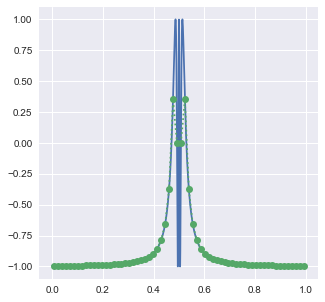

In [18]:
stim, over_sampled_stim = sfp.stimuli.check_aliasing(64, 0, w_a=6)

This second plot shows the two images, and again we can see the aliasing at the center


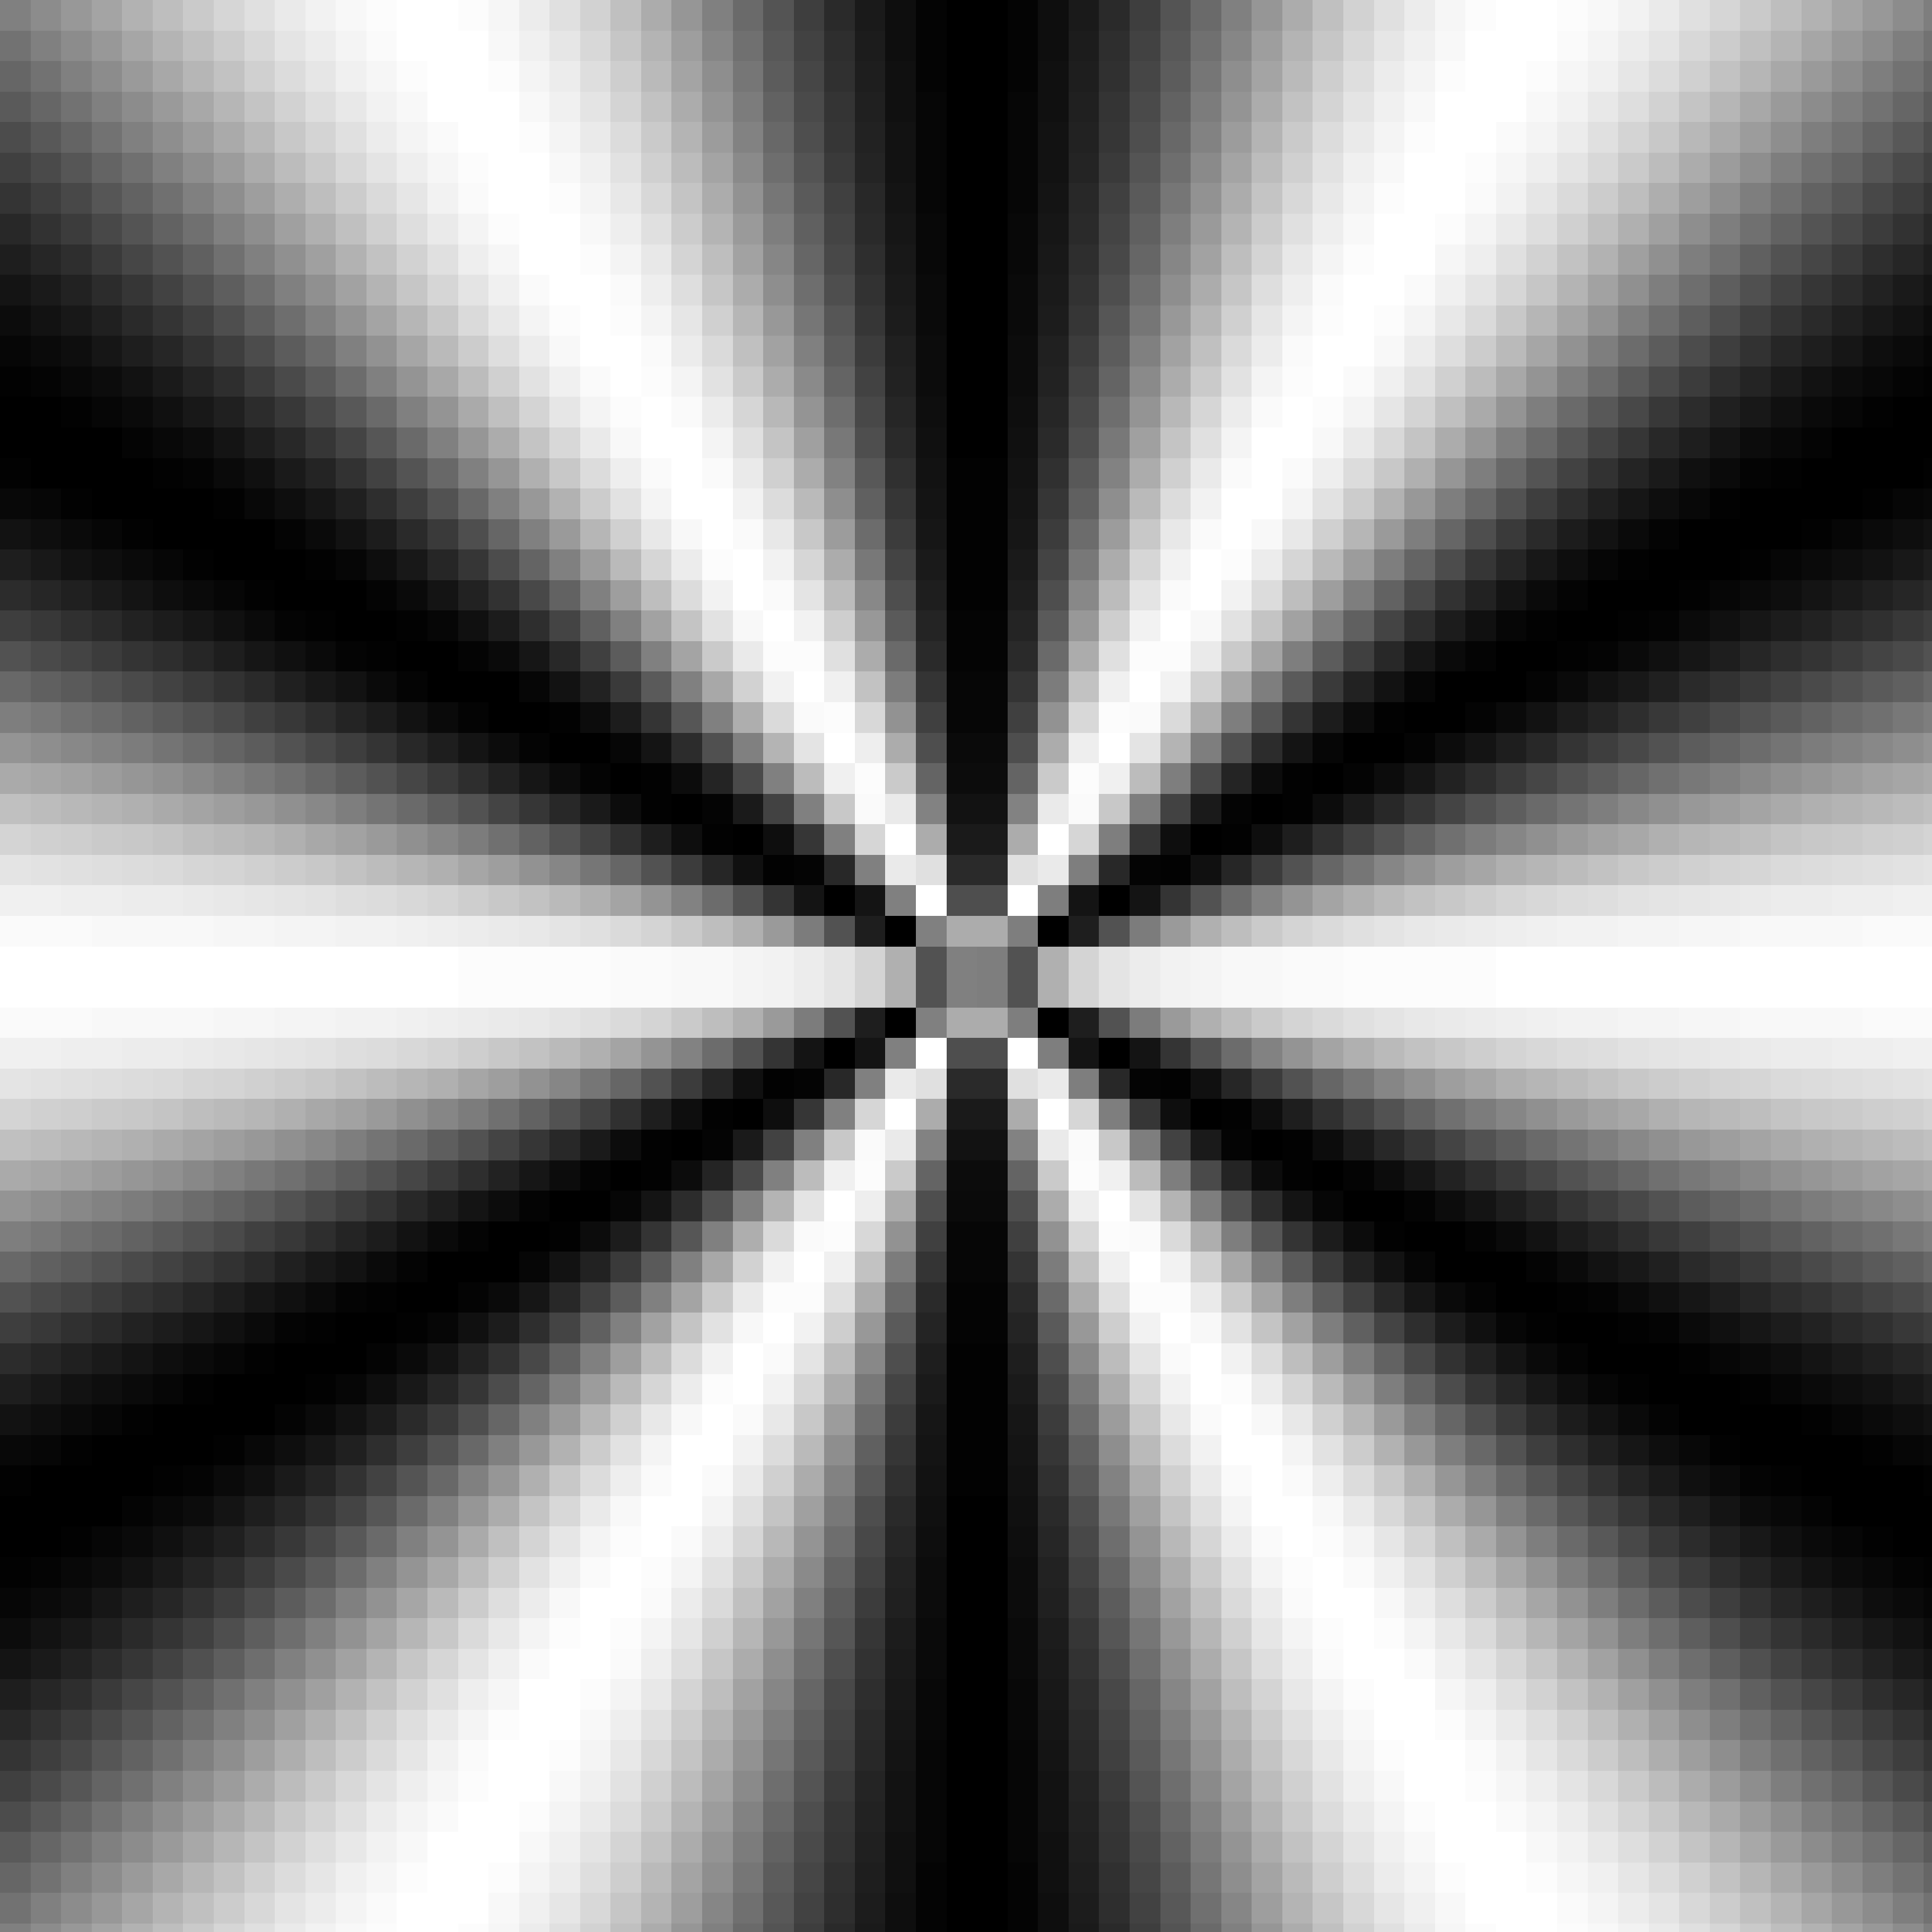
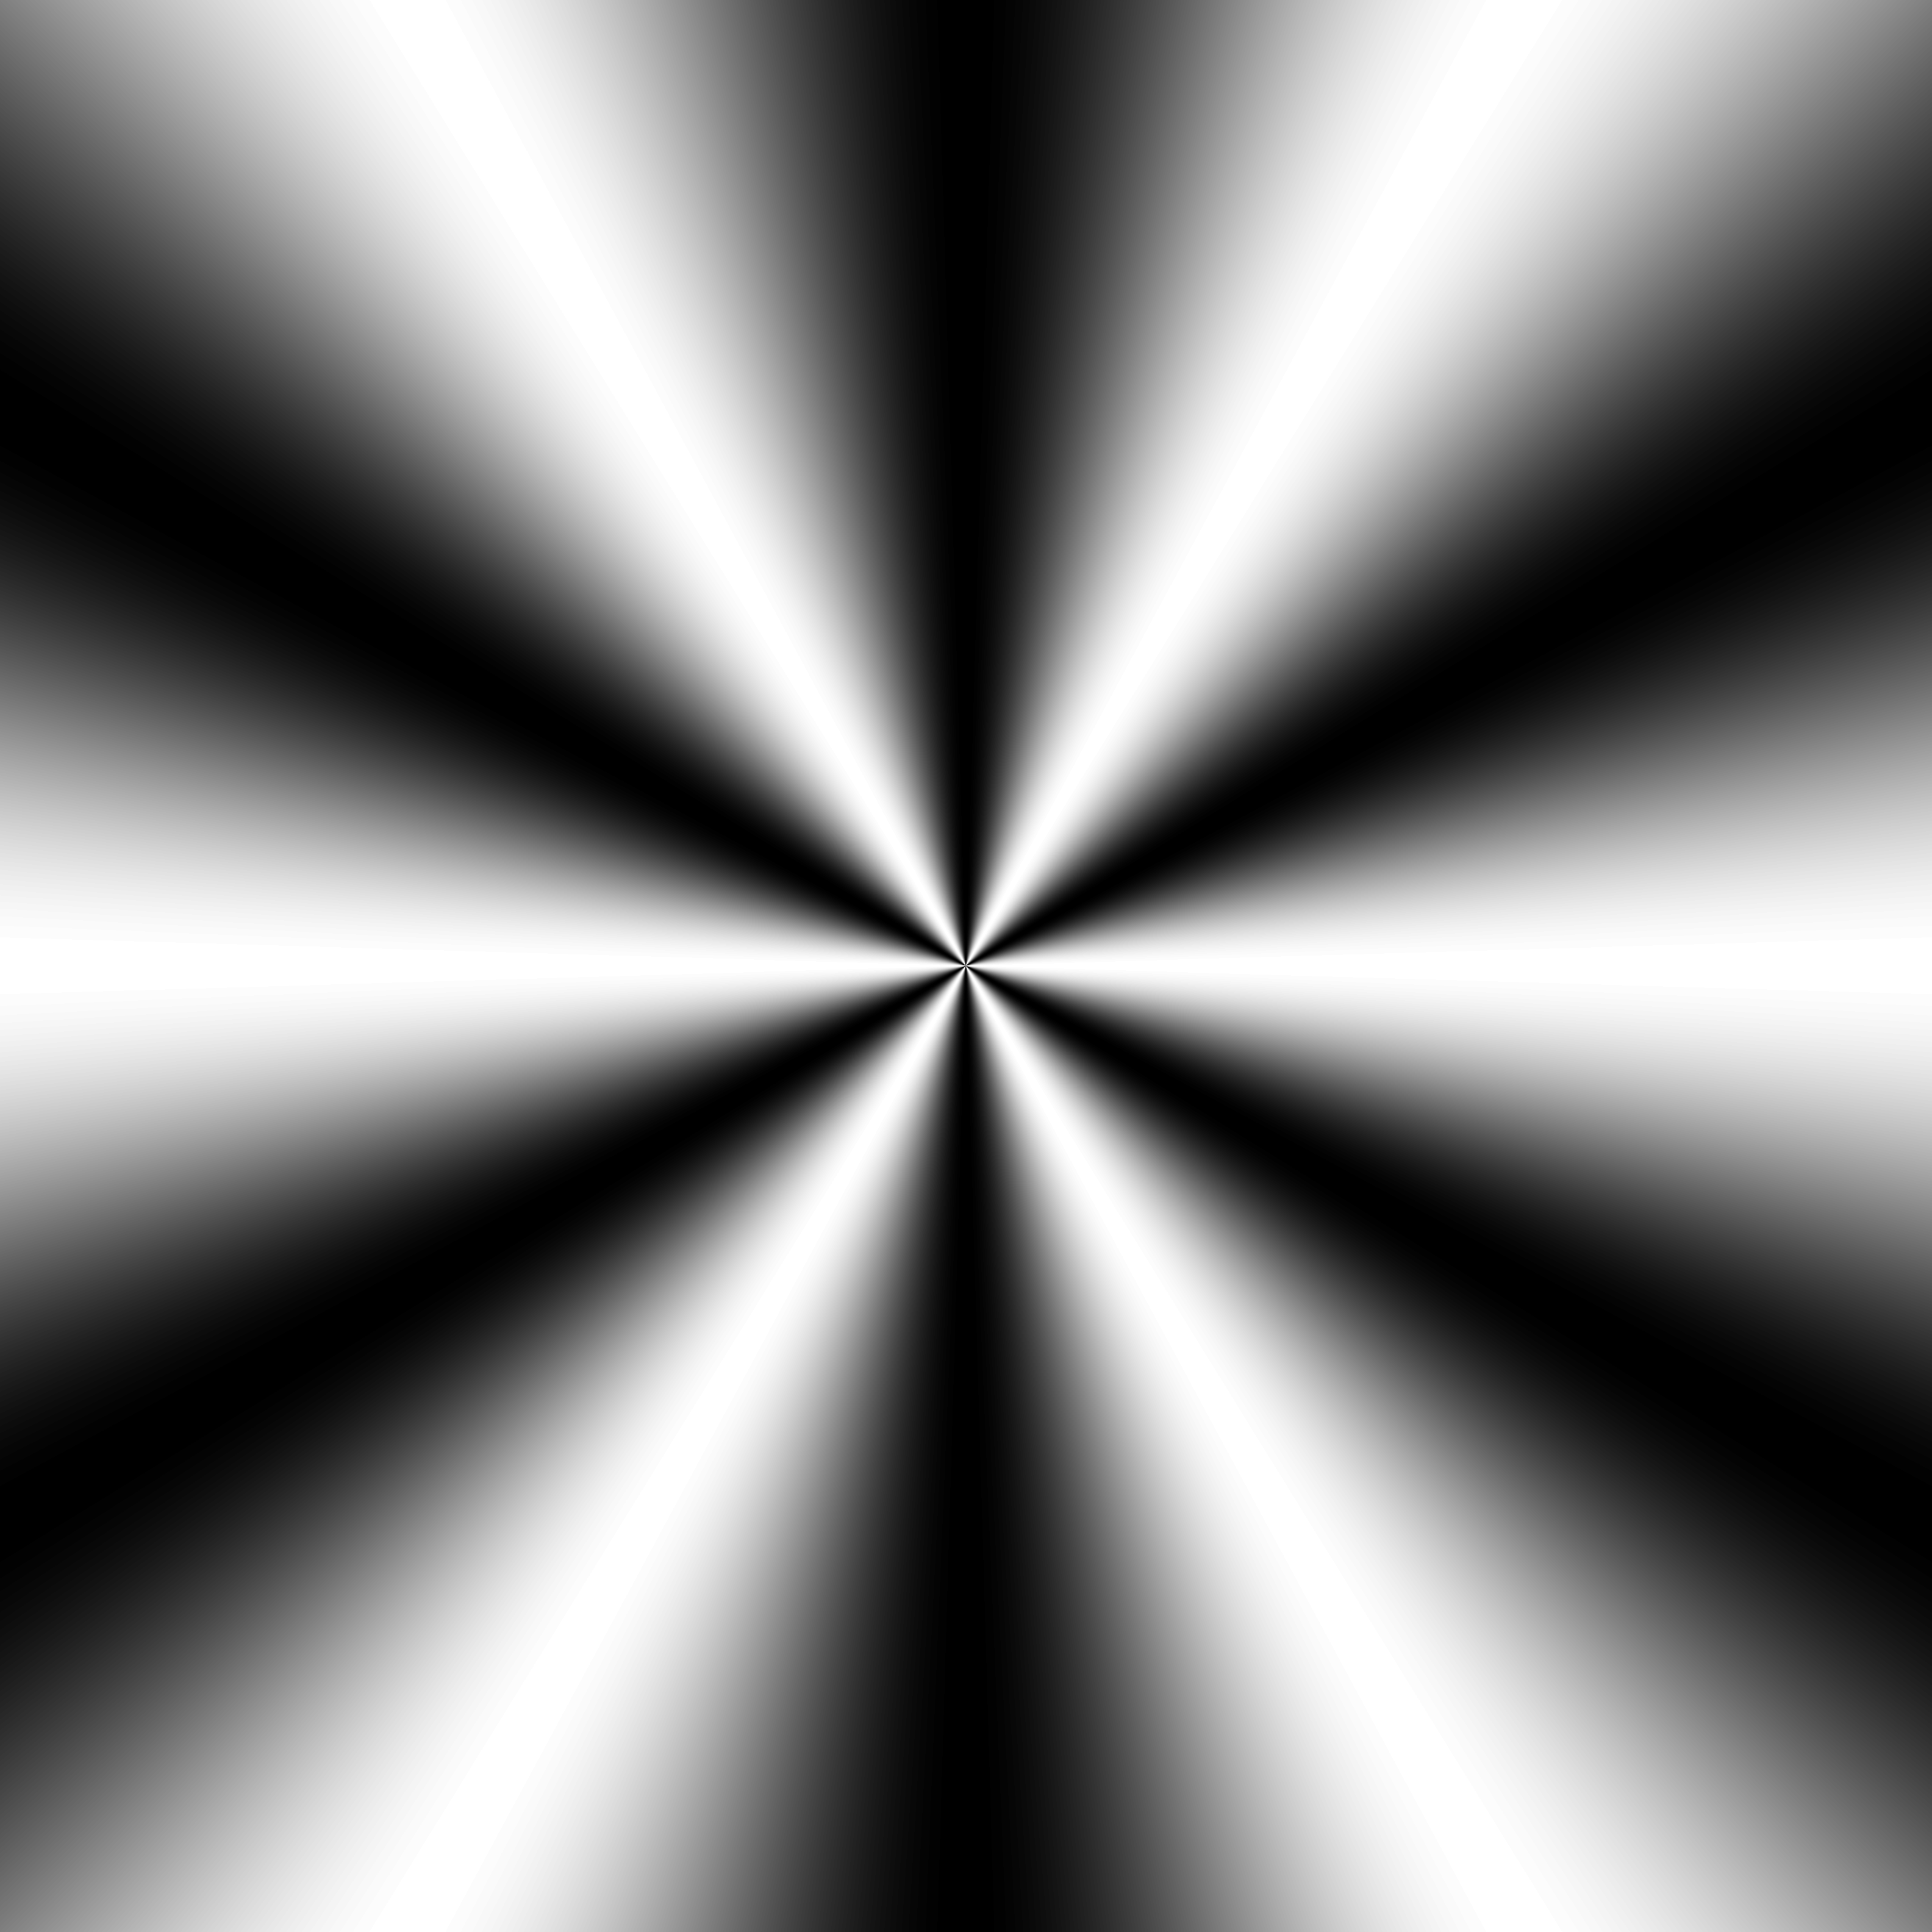

In [20]:
jbh.showIm([stim, over_sampled_stim], ncols=2, zoom=[50, .5])

To deal with this issue, we create a mask that we'll lay at the center of the image, completely masking out the aliased portion of the stimuli and then fading gradually to invisible as we move away from it.

This first plot shows the same slice as above for the un-masked, fade-masked, and binary-masked stimuli.

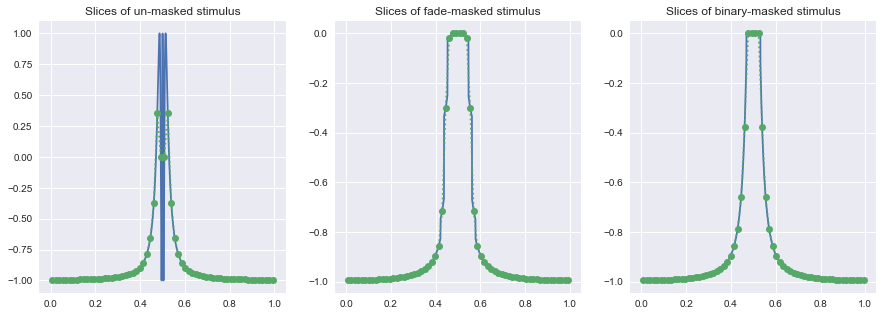

In [14]:
tmps = sfp.stimuli.check_aliasing_with_mask(64, 0, w_a=6, )

This here shows the 64 x 64 image with no mask, the faded mask, and the binary mask. We can see that the masking hides the aliased portion of the image.


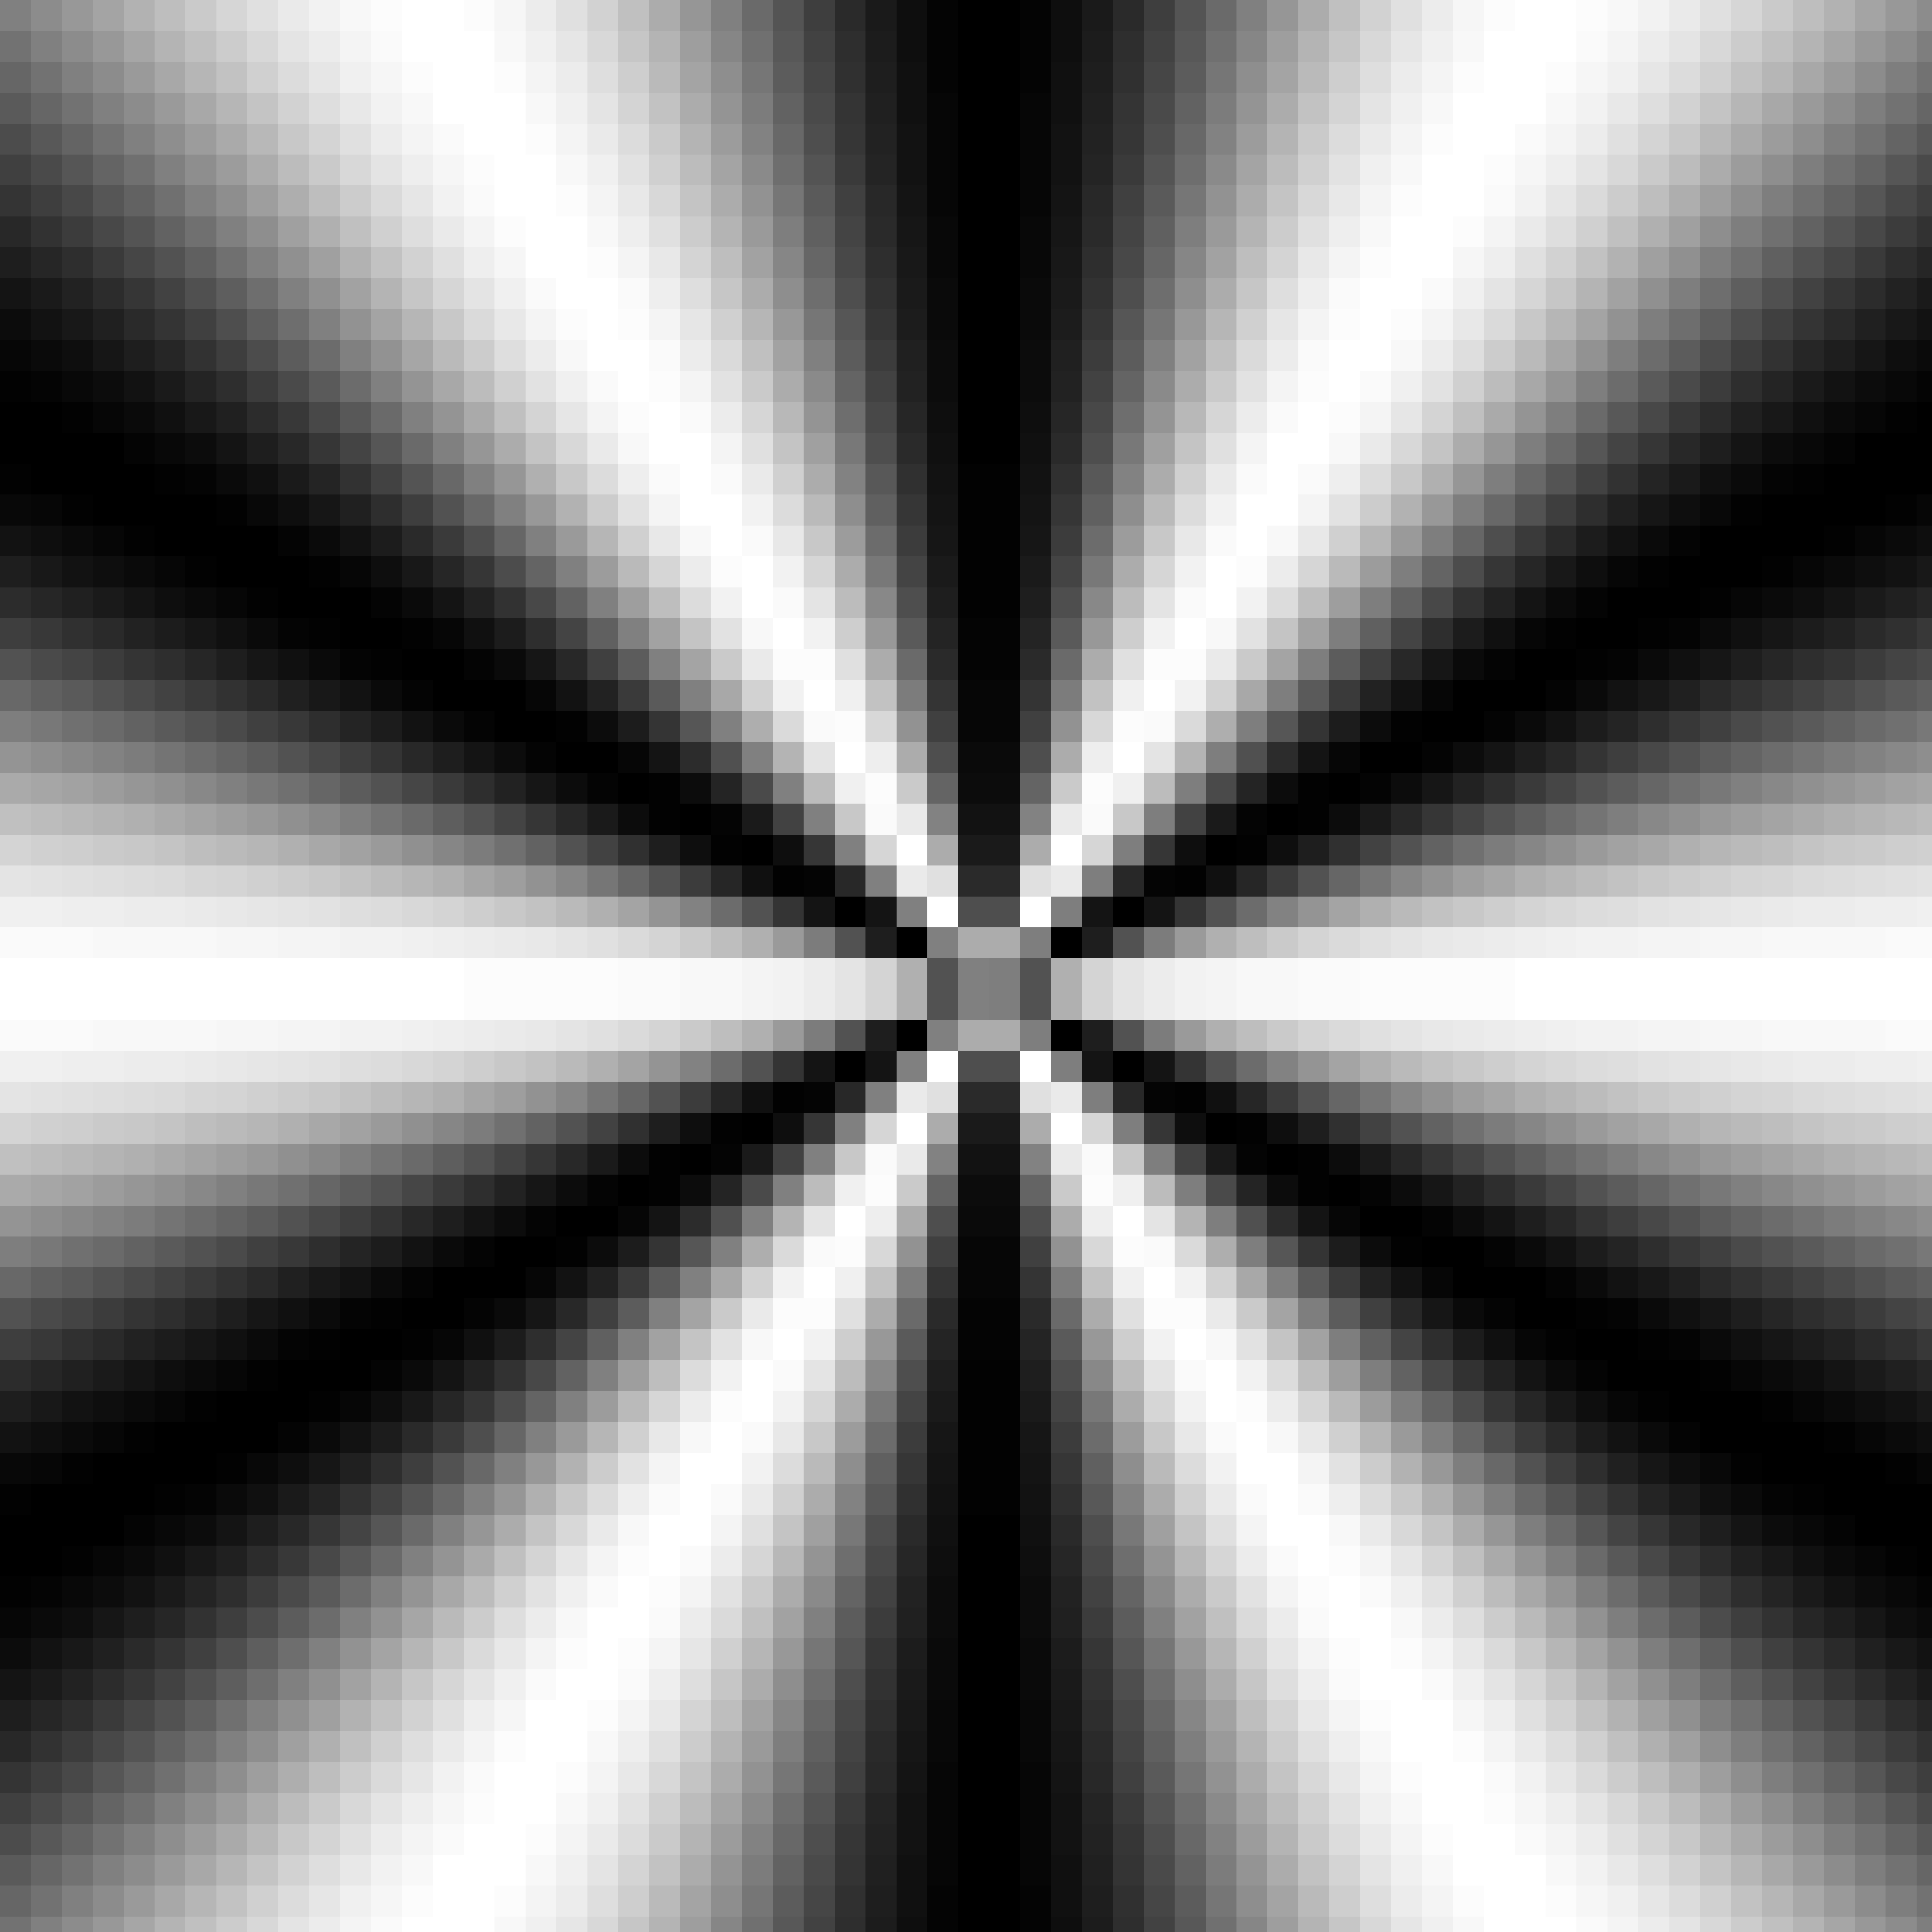
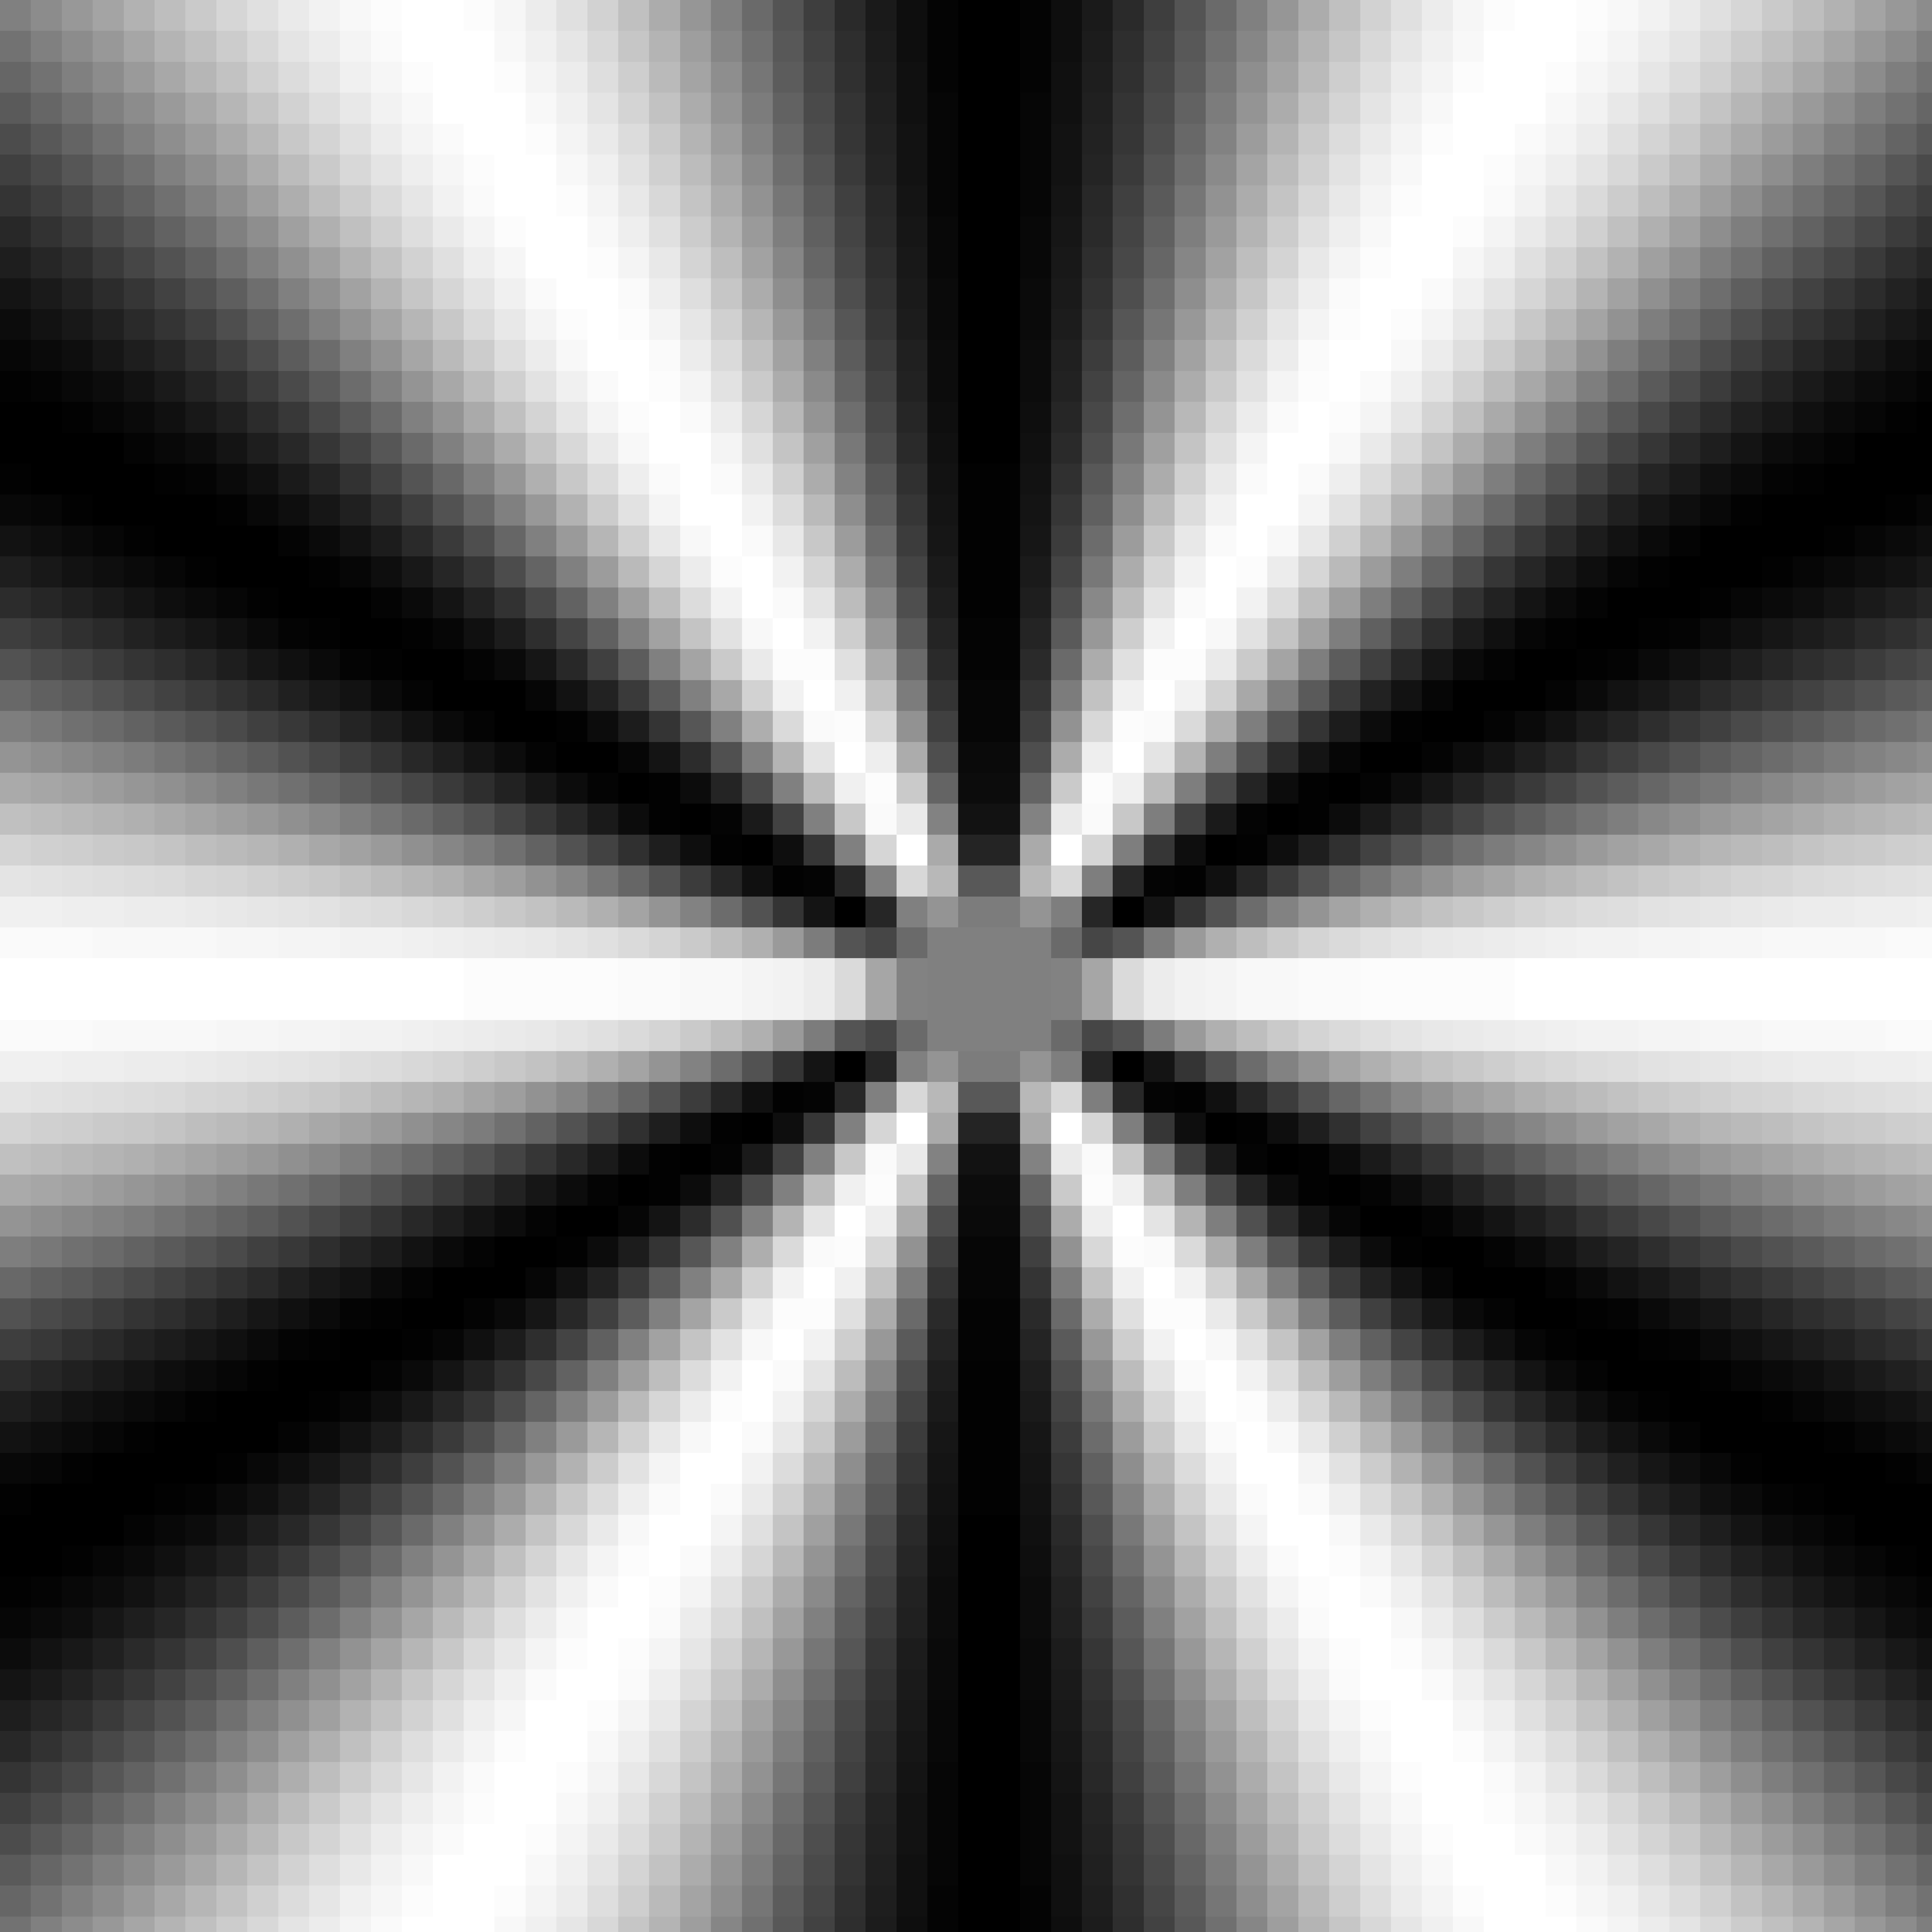
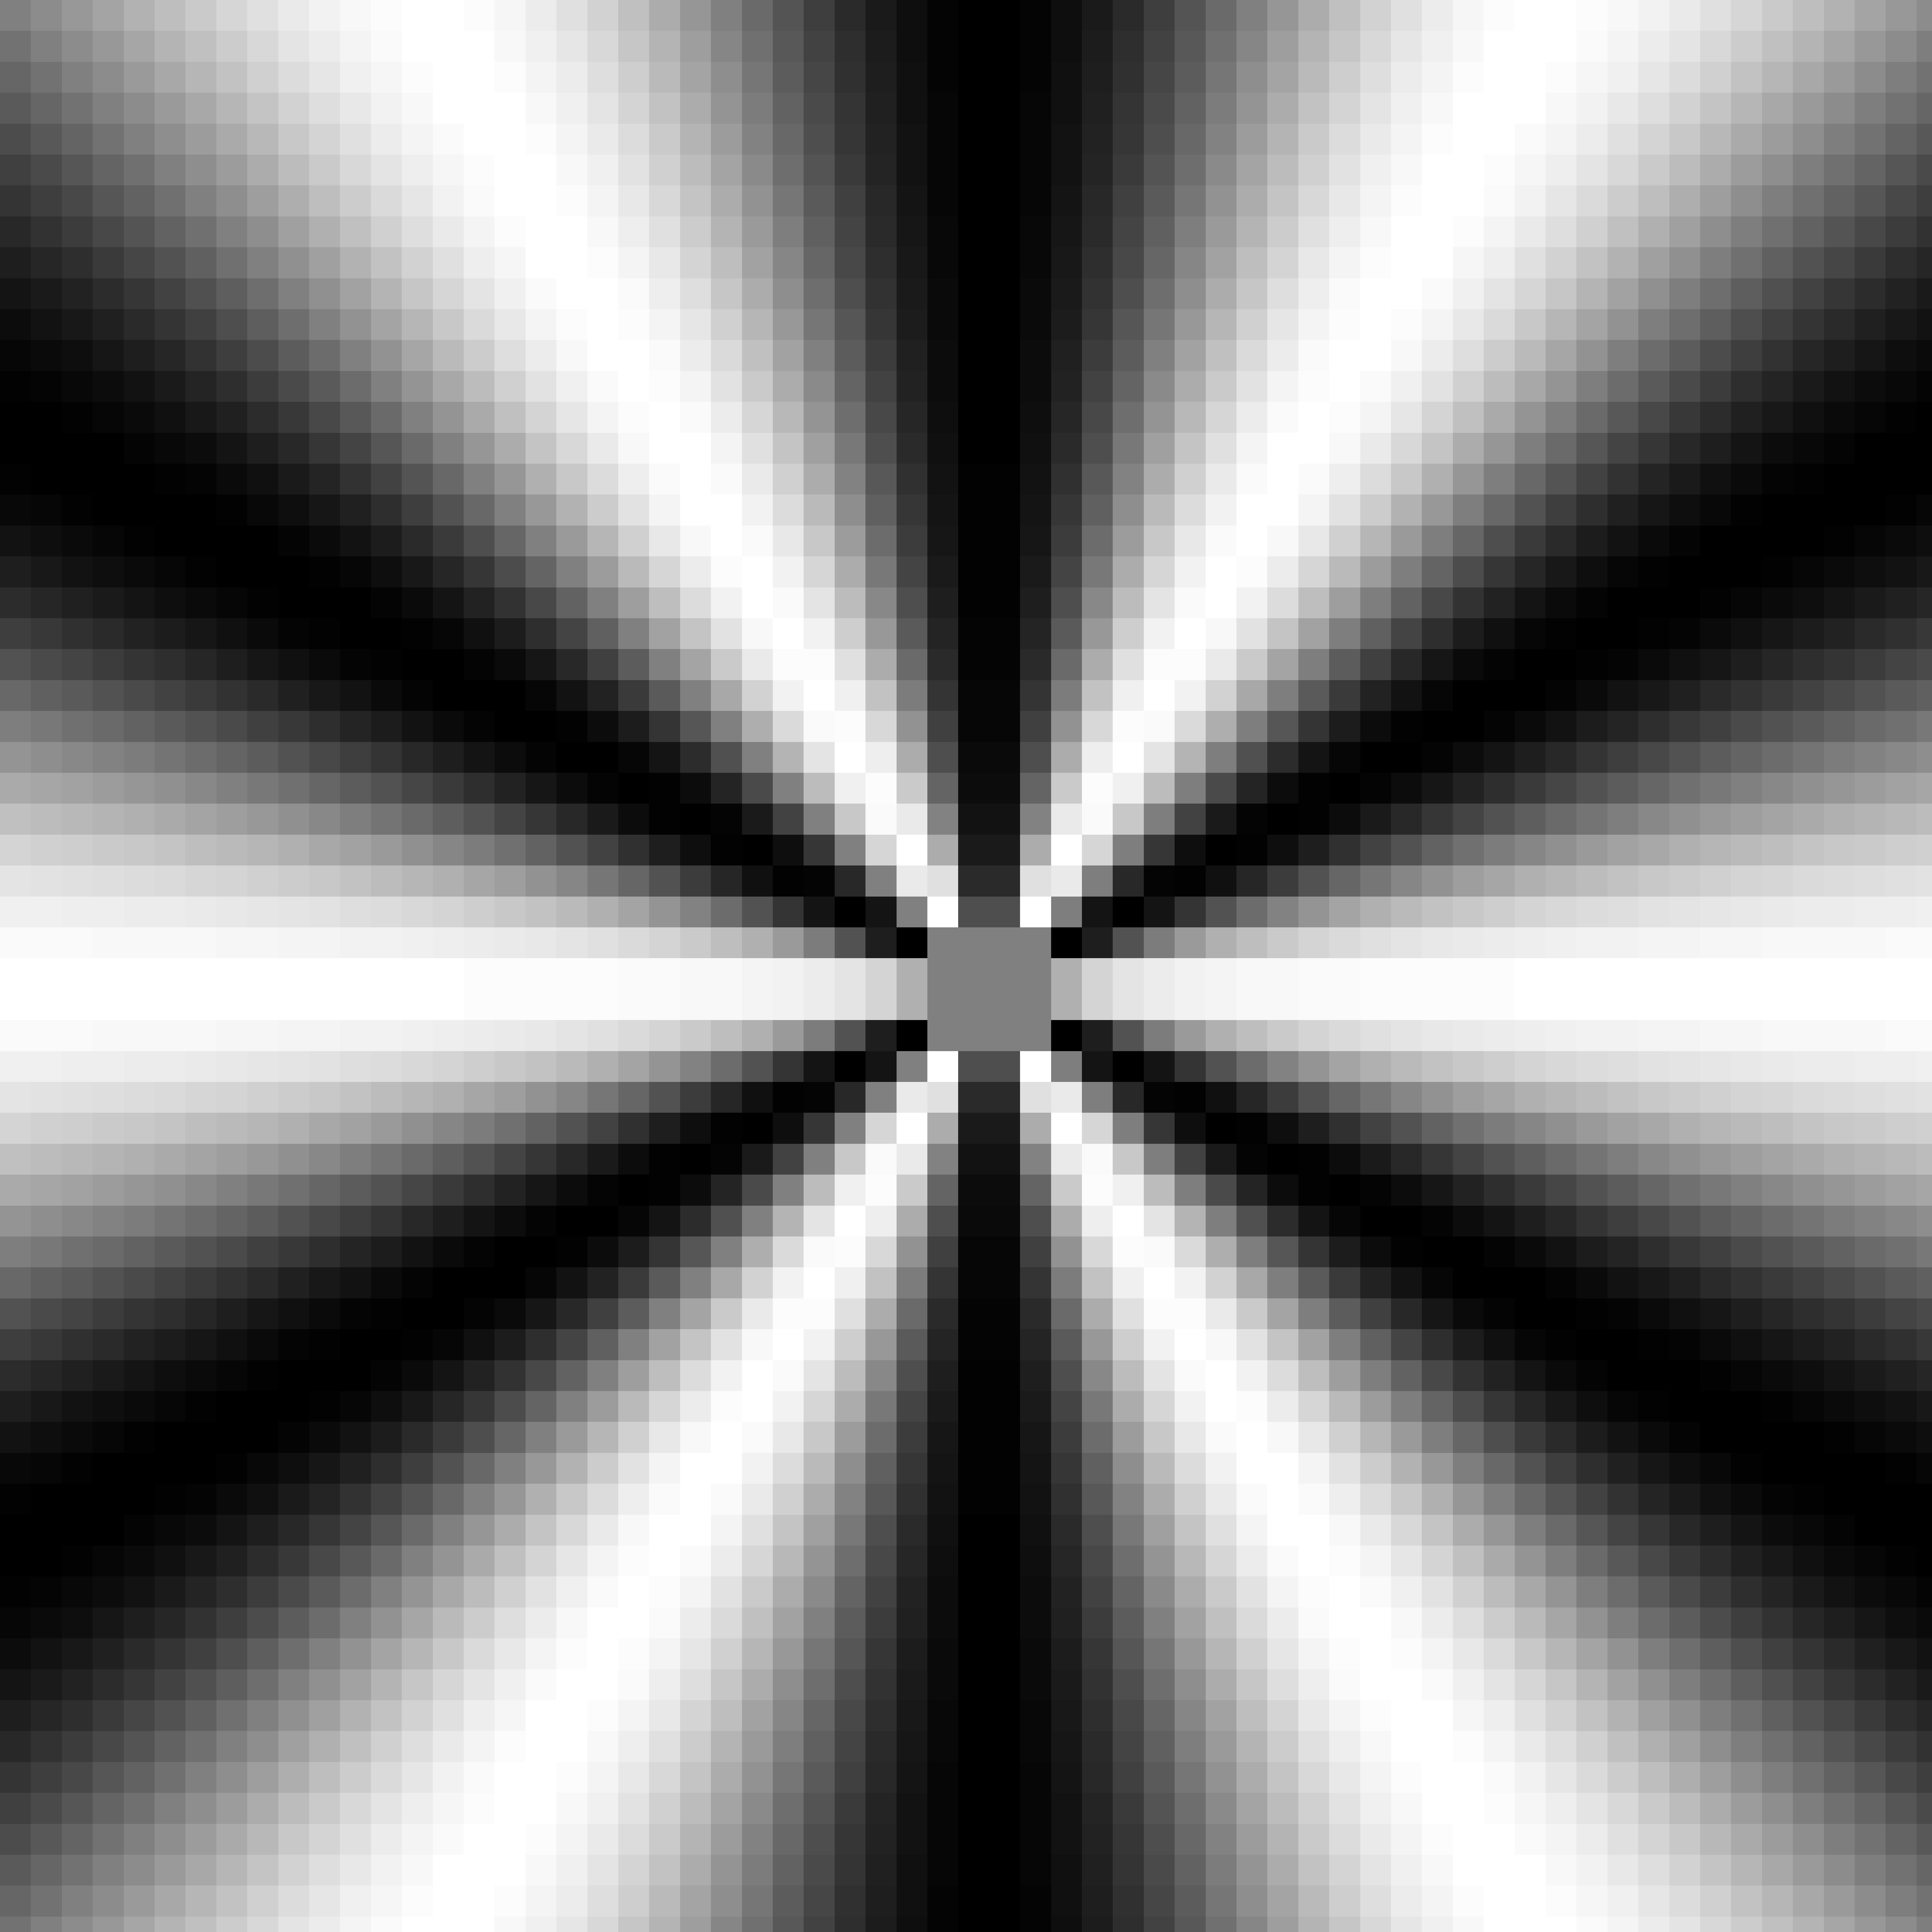

In [15]:
jbh.showIm([tmps[0], tmps[1] * tmps[0], tmps[2] * tmps[0]],# tmps[3], tmps[4]* tmps[3], tmps[5]*tmps[3]], 
           ncols=3, zoom=[100,100,100,1,1,1])